# Исследование объявлений о продаже квартир

Нам предоставлен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно  определить возможную рыночную стоимость объектов недвижимости, установить необходимые параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.



##  1. Загрузка и проверка  данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


**По каждой квартире на продажу доступны следующие признаки:**

|Признак|Описание признака|
|-------------:|:------------|
|airports_nearest|расстояние до ближайшего аэропорта в метрах (м)|
| balcony|число балконов|
|ceiling_height|высота потолков (м)|
|cityCenters_nearest|расстояние до центра города (м)|
|days_exposition|сколько дней было размещено объявление (от публикации до снятия)|
|first_day_exposition|дата публикации|
|floor|этаж|
|floors_total|всего этажей в доме|
|is_apartment|апартаменты (булев тип)|
|kitchen_area|площадь кухни в квадратных метрах (м²)|
|last_price|цена на момент снятия с публикации|
|living_area|жилая площадь в квадратных метрах (м²)|
|locality_name|название населённого пункта|
|open_plan|свободная планировка (булев тип)|
|parks_around3000|число парков в радиусе 3 км|
|parks_nearest|расстояние до ближайшего парка (м)|
|ponds_around3000|число водоёмов в радиусе 3 км|
|ponds_nearest|расстояние до ближайшего водоёма (м)|
|rooms|число комнат|
|studio|квартира-студия (булев тип)|
|total_area|общая площадь квартиры в квадратных метрах (м²)|
|total_images|число фотографий квартиры в объявлении|


В целях проверки корректности загруженных данных, ознакомления с предоставленным набором, распечатаем десять первых (метод .head()) и последних (метод .tail()) записей.

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Вывод информации о типах признаков, количестве записей, количестве ненулевых значений

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограммы по всем значениям Дата Сета:

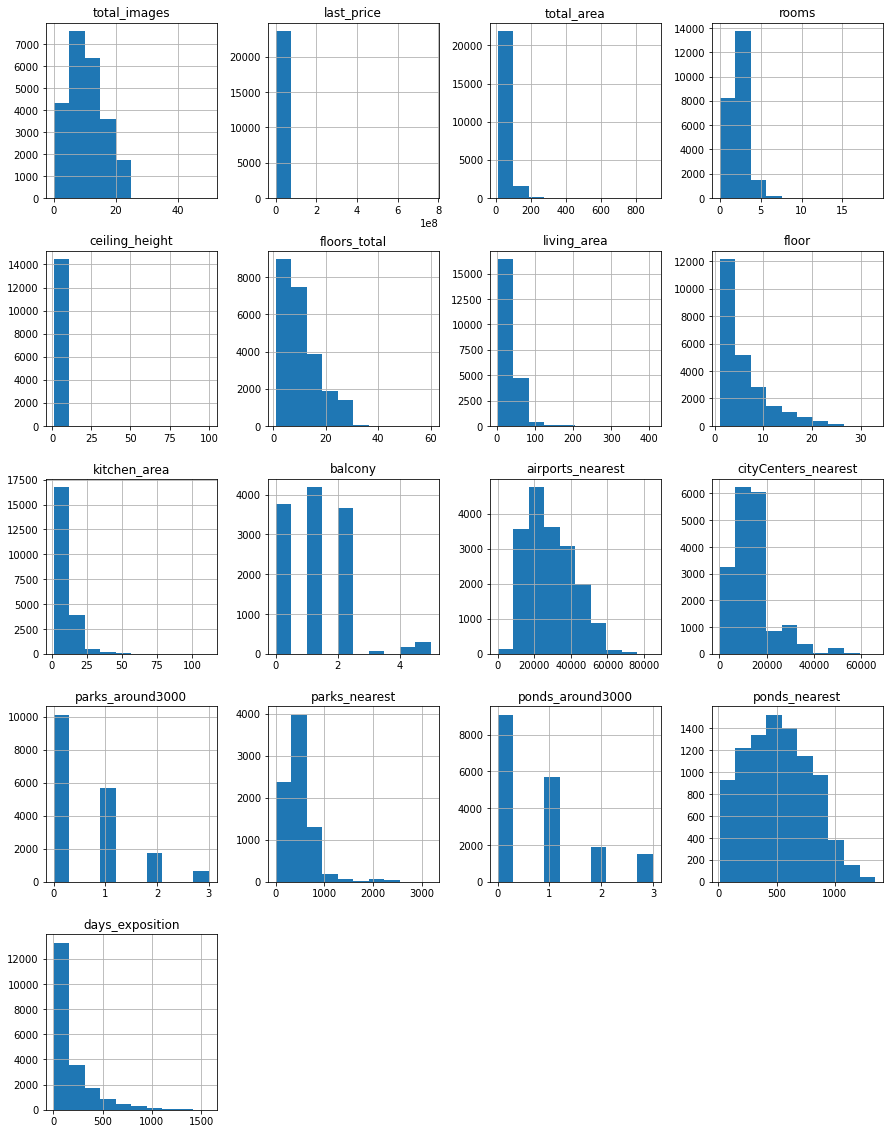

In [6]:
df.hist(figsize=(15, 20));

По признакам каждого типа получены описательные статистики

In [7]:
#df.describe()

In [8]:
for t in set(df.dtypes):
    print("Переменные типа",t)
    print(df.select_dtypes(include = [t]).describe(),'\n')

Переменные типа object
       first_day_exposition is_apartment    locality_name
count                 23699         2775            23650
unique                 1491            2              364
top     2018-02-01T00:00:00        False  Санкт-Петербург
freq                    368         2725            15721 

Переменные типа bool
       studio open_plan
count   23699     23699
unique      2         2
top     False     False
freq    23550     23632 

Переменные типа float64
         last_price    total_area  ceiling_height  floors_total   living_area  \
count  2.369900e+04  23699.000000    14504.000000  23613.000000  21796.000000   
mean   6.541549e+06     60.348651        2.771499     10.673824     34.457852   
std    1.088701e+07     35.654083        1.261056      6.597173     22.030445   
min    1.219000e+04     12.000000        1.000000      1.000000      2.000000   
25%    3.400000e+06     40.000000        2.520000      5.000000     18.600000   
50%    4.650000e+06     52.00000

## Выводы по шагу 1

Результаты проведенного первичного обследования полученной выборки позволяют сделать следующие выводы: 


1. Сформированный датафрейм имеет 23699 строк и 22 столбца.
2. В отдельных признаках содержатся пропуски и аномальные наблюдения, требуется преобразование типов. Детальная информация по каждому признаку представлена в таблице.

|№|Признак|Расшифровка|Проблемы с признаком|
|-:|-------------:|:------------|:------------|
|1|total_images| число фотографий квартиры в объявлении| установленный тип данных соответствует смыслу признака; пропусков нет; аномальных значений нет (хотя 50 фото многовато)|
|2|last_price|цена на момент снятия с публикации|проблем с признаком не обнаружено|
|3|total_area|площадь квартиры в квадратных метрах (м²)| проблем с признаком не обнаружено, однако заметим, что в основном продаются небольшие по площади квартиры порядка 70 $м^2$ , максимальная площадь 900 $м^2$, возможно это выброс, требуется проверка, есть квартира в 12$м^2$ на нее тоже следует обратить внимание     |
|4|first_day_exposition|дата публикации|пропусков нет, но тип признака  требуется сменить на тип дата|
|5|rooms|число комнат|имеется квартира без комнат `0!` и маловероятное число комнат `19!`; большинство квартир 2-х и 3-х комнатные, что адекватно соотносится с признаком `total_area`|
|6|ceiling_height|высота потолков(м)|установленный тип данных соответствует смыслу признака; имеются пропуски и аномальные значения (высота потолка 1 м и 100 м); большинство квартир имеют высоту потолков 2.50-2.80 м --- стандартная высота потолка|
|7|floors_total|всего этажей в доме|заменить тип данных на целочисленный; имеется небольшое число пропусков; максимальный этаж -- 60| 
|8|living_area|жилая площадь в квадратных метрах(м²)|имеется небольшое число пропусков; минимальная площадь 2(м²) -- маловато будет для жилого помещания, максимальная площадь составляет 409.7(м²) -- очень большая квартира|
|9|floor|этаж| пропусков нет, максимальное значение этажа - 33, скорее всего это аномалия, нужна проверка; |
|10|is_apartment|апартаменты (булев тип)|изменить тип данных на булев (bool); пропусков много, но возможно это просто указание того, что это не апартаменты|
|11|kitchen_area|площадь кухни в квадратных метрах (м²)|имеются пропуски, маловероятные значения площади кухни: минимальное 1.3(м²), а максимальное 112 (м²)|
|12|balcony|число балконов|именить тип данных на целочисленный; имеются пропуски; аномалий не замечано, но есть 5 балконов|
|13|locality_name|название населённого пункта|имеются малочисленные пропуски|
|14|airports_nearest|расстояние до ближайшего аэропорта в метрах (м)|имеются пропуски; минимальное значение 0 м -- квартира в здании аэропорта!!!|
|15|cityCenters_nearest|расстояние до центра города (м)|имеются пропуски; практически 66 км до центра города -- интересный факт|
|16|parks_around3000|число парков в радиусе 3 км|изменить тип данных на целочисленный; имеются пропуски; аномалий не замечано|
|17|parks_nearest|расстояние до ближайшего парка (м)|имеются пропуски в данных; аномалий не замечано|
|18|ponds_around3000|число водоёмов в радиусе 3 км|изменить тип данных на целочисленный; имеются пропуски; аномалий не замечано|
|19|ponds_nearest|расстояние до ближайшего водоёма (м)|имеются пропуски; аномалий не замечано|
|20|days_exposition|сколько дней было размещено объявление (от публикации до снятия)|изменить тип данных на целочисленный; имеются пропуски; аномалий не замечано|
|21|studio|квартира-студия (булев тип)|пропусков нет|                 
|22|open_plan|свободная планировка (булев тип)|пропусков нет|

## 2. Предобработка данных

**План работ на шагу 2**

На данном шаге планируется выполнить следующие работы:
1. Заменить типы признаков. 
2. Оценить количество дубликатов и, при наличии, удалить их;
3. Исследовать аномальные наблюдения;
4. Восстановить пропуски;


1. В нижеследующей таблице указаны признаки, для которых нужно преобразовать тип данных.

|Признак|Текущий тип данных|Необходимый тип данных|
|-------------:|:------------|:------------|
|floors_total|float64|int64|
|balcony|float64|int64|
|parks_around3000|float64|int64|
|ponds_around3000|float64|int64|
|days_exposition|float64|int64|
|is_apartment|object|bool|

Для замены типа данных воспользуемся цепочкой .astype().dtypes, передав в качестве параметра словарь, содержащий пары
{имя переменной : новый тип,…}

In [9]:
df=df.astype({'floors_total':'Int64', 'balcony':'Int64', 
                  'parks_around3000':'Int64', 'ponds_around3000':'Int64',
                  'days_exposition':'Int64', 'is_apartment':'bool'}, errors='ignore')
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total              Int64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   Int64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000          Int64
parks_nearest           float64
ponds_around3000          Int64
ponds_nearest           float64
days_exposition         float64
dtype: object

один столбец не поменял тип, пока оставим это, но запомним  - days_exposition

In [10]:
df['days_exposition'].unique()

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

**2.2 проверим количество дубликатов** 

In [11]:
df.duplicated().sum()

0

Явных дубликатов не обнаружено. Но названия населенных пунктов могут быть записаны некорректно. вернемся к поиску дубликатов, когда поправим эти значения.

**3. Проверим аномальные значения. На них следует обратить внимание в первую очередь, т.к. они могут повлиять на достоверность в востановлении пропусков.**

Ранее были выявлены следующие проблемы:

|№|Признак|Расшифровка|Проблемы с признаком|
|-:|-------------:|:------------|:------------|
|3|total_area|площадь квартиры в квадратных метрах (м²)| проблем с признаком не обнаружено, однако заметим, что в основном продаются небольшие по площади квартиры порядка 70 $м^2$ , максимальная площадь 900 $м^2$, возможно это выброс, требуется проверка, есть квартира в 12$м^2$ на нее тоже следует обратить внимание     |
|5|rooms|число комнат|имеется квартира без комнат `0!` и маловероятное число комнат `19!`; большинство квартир 2-х и 3-х комнатные, что адекватно соотносится с признаком `total_area`|
|6|ceiling_height|высота потолков(м)|установленный тип данных соответствует смыслу признака; имеются пропуски и аномальные значения (высота потолка 1 м и 100 м); большинство квартир имеют высоту потолков 2.50-2.80 м --- стандартная высота потолка|
|8|living_area|жилая площадь в квадратных метрах(м²)|имеется небольшое число пропусков; минимальная площадь 2(м²) -- маловато будет для жилого помещания, максимальная площадь составляет 409.7(м²) -- очень большая квартира|
|9|floor|этаж| пропусков нет, максимальное значение этажа - 33, скорее всего это аномалия, нужна проверка; |
|11|kitchen_area|площадь кухни в квадратных метрах (м²)|имеются пропуски, маловероятные значения площади кухни: минимальное 1.3(м²), а максимальное 112 (м²)|
|12|balcony|число балконов|именить тип данных на целочисленный; имеются пропуски; аномалий не замечано, но есть 5 балконов|
|14|airports_nearest|расстояние до ближайшего аэропорта в метрах (м)|имеются пропуски; минимальное значение 0 м -- квартира в здании аэропорта!!!|



**2.3 проверка признака total_area на аномальные значения**

выведем список квартир более 500 кв. м. и тех, что менее 15

In [12]:
df[df['total_area']>500]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,NaN,5,NaN,5,True,...,60.0,<NA>,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,NaN
4237,1,50000000.0,517.0,2017-10-14T00:00:00,7,NaN,4,332.0,3,True,...,22.0,<NA>,Санкт-Петербург,22835.0,1847.0,2,477.0,2,540.0,NaN
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6,409.0,3,True,...,100.0,<NA>,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14.0
8018,20,84000000.0,507.0,2015-12-17T00:00:00,5,4.45,7,301.5,7,True,...,45.5,1,Санкт-Петербург,NaN,5735.0,2,110.0,0,NaN,1078.0
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.90,4,322.3,4,True,...,19.5,1,Санкт-Петербург,25707.0,4972.0,0,NaN,2,210.0,NaN
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7,258.0,5,True,...,70.0,<NA>,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25,409.7,25,True,...,112.0,<NA>,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0


на первый взгляд аномалий в даннх нет, большая площадь соответствует большой цене объекта, и вполне может быть.

проверим маленькие квартиры

In [13]:
#выведем некоторые столбцы, нужные для анализа
df[df['total_area']<15][['total_area','rooms','living_area','kitchen_area','studio']] 

,total_area,rooms,living_area,kitchen_area,studio
17961,13.0,1,NaN,NaN,False
19546,13.0,1,NaN,NaN,False
19558,13.2,1,NaN,NaN,False
19642,14.0,1,11.0,2.0,False
19807,13.0,1,10.0,NaN,False
19904,12.0,1,10.0,NaN,False


Все маленькие квартиры содержат 1 комнату, их общая площадь больше, чем жилая, они не являются студиями.
    
Последний пункт сомнителен, но явных ошибак данные не содержат и таких квартир мало. Нет основания считать их аномалиями. Нужно уточнить нормы для строительства жилых помещений. Возможно тогда это будут аномальные значения.

**2.3 проверим анамалии в значении числа комнат (столбец rooms)**

In [14]:
#посмотрим уникальные значения количества комнат
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

посмотрим на квартиры имеющие странные значения ( 0 и максимум 19)


In [15]:
df[(df['rooms']==0)|(df['rooms']==19)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24,15.50,2,True,...,NaN,2,посёлок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14,17.00,1,True,...,NaN,0,деревня Кудрово,NaN,NaN,<NA>,NaN,<NA>,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17,24.75,4,True,...,NaN,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26,24.30,19,True,...,NaN,1,посёлок Парголово,53115.0,19292.0,0,NaN,1,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10,NaN,7,True,...,NaN,<NA>,посёлок Шушары,NaN,NaN,<NA>,NaN,<NA>,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25,18.00,16,True,...,NaN,0,Санкт-Петербург,11405.0,13222.0,0,NaN,1,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,NaN,24,18.00,4,True,...,NaN,2,посёлок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19,NaN,8,True,...,NaN,<NA>,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,NaN,9,18.00,8,True,...,NaN,2,Никольское,NaN,NaN,<NA>,NaN,<NA>,NaN,82.0


Значений много. Рассмотрим сначала те, где количество комнат равно 0.Посмотрим, есть ли у них кухни и какая общая площадь таких квартир

In [16]:
df[df['rooms']==0][['total_area','rooms','living_area','kitchen_area','studio','open_plan']].tail(10)

,total_area,rooms,living_area,kitchen_area,studio,open_plan
22521,23.39,0,13.54,NaN,True,False
22573,24.00,0,15.00,NaN,False,True
22832,28.00,0,16.80,NaN,True,False
22867,30.00,0,18.20,NaN,True,False
22877,28.00,0,18.00,NaN,True,False
23210,26.00,0,18.00,NaN,True,False
23442,27.70,0,18.00,NaN,False,True
23554,26.00,0,NaN,NaN,True,False
23592,29.00,0,18.00,NaN,False,True
23637,26.00,0,17.00,NaN,True,False


Про кухню в таких квартирах данных нет, есть информация про общую площадь (там нет пропусков) и некоторые являются студиями. Многие имеют свободную планировку. Возможно при таких условиях указать количество комнат действительно нельзя. На данном этапе не будем ничего делать с этим параметром, но запомним его.

Проверим квартиры с 16 и 19 комнатами (максимальные значения).

In [17]:
df[(df['rooms']==16)|(df['rooms']==19)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000.0,374.6,2018-06-09T00:00:00,19,NaN,5,264.5,2,True,...,27.6,<NA>,Санкт-Петербург,19497.0,3574.0,0,NaN,2,548.0,114.0
18848,6,28500000.0,270.0,2015-03-02T00:00:00,16,3.0,4,180.0,4,True,...,13.0,1,Санкт-Петербург,23575.0,4142.0,1,516.0,0,NaN,1365.0


Общая площадь и цена таких квартир соответствует такому количеству комнат, нет оснований считать данные недостоверными.

**2.3.2 Посмотрим на значение параметра высота потолков (ceiling_height)**	

мы выявили минимальное значение 1 метр и максимум 100, плюс есть странные значения. Сначала посмотрим, какие значения в принципе там есть.

In [18]:
sorted(df['ceiling_height'].unique())

[1.0,
 2.0,
 2.3,
 2.4,
 2.45,
 2.46,
 2.48,
 2.53,
 2.59,
 2.62,
 2.63,
 2.7,
 nan,
 1.2,
 1.75,
 2.2,
 2.25,
 2.34,
 2.47,
 2.49,
 2.5,
 2.51,
 2.52,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.6,
 2.61,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,


Что бы понять, какие значения считать аномальными, нужно узнать, какие нормы для этого параметра существуют. Это можно сделать обратившись к строительной документации:

1.1*. Высота жилых помещений от пола до потолка должна быть не менее 2,5 м, для климатических подрайонов IА, IБ, IГ, IД, IIА - не менее 2,7 м. Высоту этажей от пола до пола для жилых домов социального назначения рекомендуется принимать не более 2,8 м, для климатических подрайонов IА, IБ, IГ, IД, IIА - не более 3,0 м. Высота внутриквартирных коридоров должна быть не менее 2,1 м.

Установленно так же,  что в "сталинках" высота потолка варьируется от 3 до 3.5 метров, но есть и квартиры с потолками более 4 метров, относящиеся к классу "люкс".

Квартиры-студии здесь четких норм нет, едининственно, что удалось найти, это 3.2 м --- минимальная высота потока, при которой можно уже организовывать подобную квартиру, также известно о продаже квартир с 6-метровыми потолками, позиционирующихся именно как квартиры-студии.

Для выявления критических (недопустимых) значений потолка установим минимально возможную высоту в 2.1 метра (вдруг высоту потолка измеряли в коридоре).


In [19]:
df.query('ceiling_height < 2.1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15,17.5,6,True,...,6.50,<NA>,Санкт-Петербург,33972.0,11746.0,1,520.0,1,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27T00:00:00,3,2.00,5,40.0,4,True,...,6.00,1,Луга,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18,16.6,9,True,...,8.80,2,Тосно,NaN,NaN,<NA>,NaN,<NA>,NaN,36.0
5712,5,1500000.0,42.80,2017-08-14T00:00:00,2,1.20,2,27.5,1,True,...,5.20,<NA>,городской посёлок Мга,NaN,NaN,<NA>,NaN,<NA>,NaN,248.0
5850,9,1650000.0,35.50,2018-05-29T00:00:00,1,2.00,5,NaN,5,True,...,NaN,<NA>,Луга,NaN,NaN,<NA>,NaN,<NA>,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18T00:00:00,1,2.00,17,15.2,12,True,...,10.10,0,посёлок Металлострой,25268.0,26980.0,0,NaN,0,NaN,53.0
16446,6,12300000.0,88.30,2019-03-12T00:00:00,3,2.00,5,63.9,2,True,...,12.00,<NA>,Санкт-Петербург,38415.0,7675.0,1,568.0,1,154.0,NaN
16884,0,1500000.0,33.00,2018-10-03T00:00:00,1,2.00,5,20.0,5,False,...,6.00,<NA>,Выборг,NaN,NaN,<NA>,NaN,<NA>,NaN,6.0
16934,5,4100000.0,40.00,2017-10-17T00:00:00,1,1.75,37,17.4,5,True,...,8.34,<NA>,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,71.0
19098,7,2700000.0,56.00,2018-02-04T00:00:00,3,2.00,5,46.0,1,True,...,6.00,<NA>,Выборг,NaN,NaN,<NA>,NaN,<NA>,NaN,282.0


Такие квартиры есть, но их мало, всего 14 шт. Их можно удалить и проверить результат.

In [20]:
df.drop(df[df.ceiling_height < 2.1].index, inplace=True)
df.query('ceiling_height < 2.1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Ограничим максимальную величину потолков 6 метров. Дла понимания результатов посмотрим на исключения и соотнесем их с площадью квартиры.

In [21]:
df.query('ceiling_height > 6').pivot_table(index="ceiling_height", values="living_area", aggfunc='max')

,living_area
ceiling_height,
8.0,41.0
8.3,19.3
10.3,15.5
14.0,32.4
20.0,53.2
22.6,35.0
24.0,19.5
25.0,32.0
26.0,21.3


Подозрительными являются высоты потолков (22.6,24.0,25.0, 26.0, 27.0, 27.5, 32.0)
Для реальных высот потолков они являются маловероятными, а вот ошибками оператора при вводе значений вполне могут быть. Оставим записи с этими значениями потолков, предварительно поделив их на 10. Остальные записи удалим. Вероятность квартиры указанной площади с такой высотой потолков ничтожно мала. Проверим результат.

In [22]:
df.loc[(df.ceiling_height >= 22.6) & (df.ceiling_height <= 32), 'ceiling_height'] /= 10
df.drop(df[df.ceiling_height > 6].index, inplace=True)
df.query('ceiling_height > 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Разобравшись с аномалиями в признаке ceiling_height, восстановим его значения. Будем руководствоваться информацией, полученной из внешних источников о нормах высоты потолков.

Для квартир с пропусками по признаку ceiling_height заполним их нормативным значением высоты потолка 2.64 м.

In [23]:
df.ceiling_height.fillna(2.64, inplace=True)
df['ceiling_height'].isnull().sum()

0

**2.3.3 Проверяем `living_area`	жилая площадь в квадратных метрах(м²)**

По нормам жилого строительства, минимальная жилая площадь составляет 14 м². Установим это значение в качестве нижней границы признака living_area. Верхнюю определим по ящику с усами и гистограмме.

Здесь стратегия заполнения пропусков проста: общую площадь квартиры - (площадь кухни + площадь санузла).

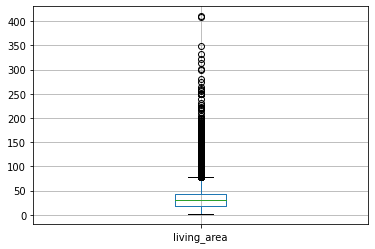

In [24]:
df.boxplot(column=['living_area']);

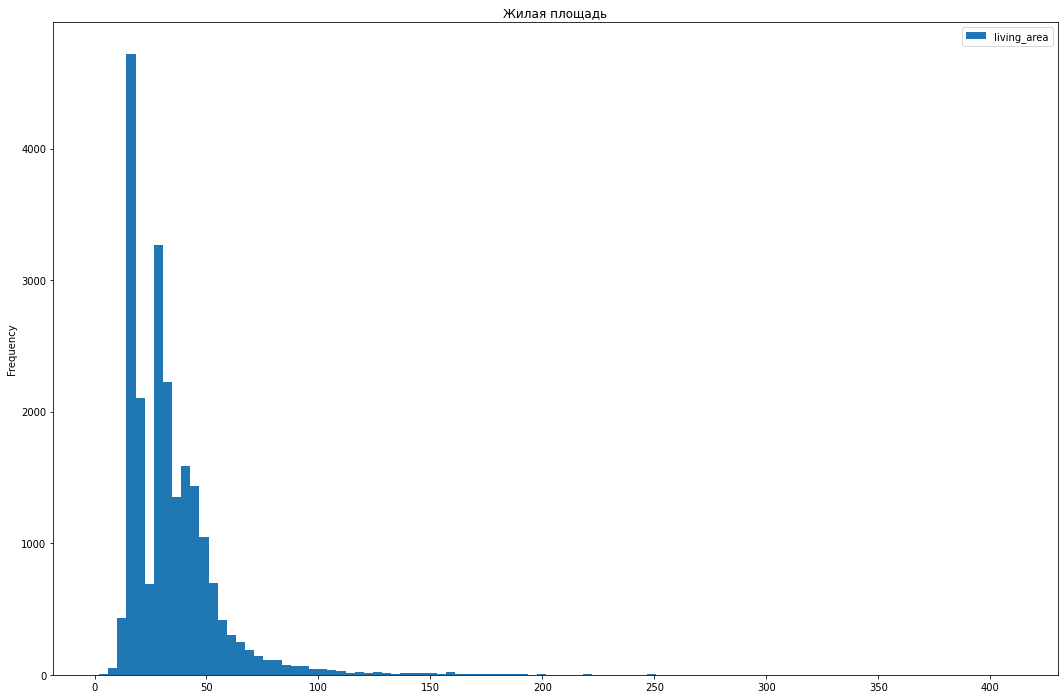

In [25]:
df.plot(y='living_area', title='Жилая площадь', kind='hist', bins=100, figsize=(18,12));

Верхнюю границу жилой площади определим в 200 кв.м. Большие значения редки и они будут портить статистику.

In [26]:
df.query('living_area < 14 | living_area > 200')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.64,26,10.60,6,True,...,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0
101,4,3000000.0,37.00,2019-03-23T00:00:00,1,2.75,10,12.00,3,True,...,13.00,<NA>,садовое товарищество Новая Ропша,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
114,5,4000000.0,21.40,2019-02-07T00:00:00,1,2.90,8,8.30,7,True,...,6.30,<NA>,Санкт-Петербург,27089.0,5791.0,2,488.0,1,286.0,NaN
248,7,4100000.0,31.00,2015-08-02T00:00:00,1,3.00,17,10.00,6,False,...,NaN,0,Санкт-Петербург,39771.0,8672.0,1,139.0,0,NaN,637.0
352,3,5496074.0,48.60,2016-04-25T00:00:00,1,2.64,11,13.00,3,False,...,15.00,2,Санкт-Петербург,23609.0,5299.0,0,NaN,1,433.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1,3000000.0,37.29,2019-04-15T00:00:00,1,2.64,19,10.08,10,True,...,16.88,<NA>,Санкт-Петербург,37006.0,15157.0,0,NaN,0,NaN,7.0
23573,8,6290000.0,47.67,2019-03-20T00:00:00,1,3.60,12,13.59,12,True,...,17.87,2,Санкт-Петербург,35726.0,16028.0,1,253.0,2,99.0,19.0
23574,14,64990000.0,139.00,2015-11-24T00:00:00,3,3.00,8,3.00,8,True,...,16.00,1,Санкт-Петербург,33255.0,5975.0,1,630.0,3,100.0,280.0
23673,9,3100000.0,23.00,2018-03-19T00:00:00,1,2.80,9,12.60,1,True,...,5.00,2,Санкт-Петербург,11813.0,11881.0,1,262.0,1,442.0,41.0


Данных много, но они не соответствуют нормативам, поэтому удалим их. Проверим результат.

In [27]:
df.drop(df[(df.living_area < 14) | (df.living_area > 200)].index, inplace=True)
df.query('living_area < 14 | living_area > 200')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Будем заполнять пропуски по формуле, которую получили на основании того, что по нормам сантех помещения не могут быть меньше 3 кв. м. Возьмем значение 5 кв. м. , как среднее в данной категории. Т.е. Жилая площадь = общая площадь квартиры - (площадь кухни + площадь санузла (5 кв м)).

Но т.к. у нас есть пропуски в разделе кухня `kitchen_area`, то разберемся сначала с ними.

**2.3.4 раздел площадь кухни `kitchen_area`**

Напомню, что данный признак содержит маловероятные значения площади кухни: минимальное 1.3(м²), а максимальное 112 (м²). Обратимся к документации, нормам строительства (**СП 54.13330.2016 Здания жилые многоквартирные**): 

5.7 Площадь квартир социального использования государственного и муниципального жилищных фондов согласно ЖК РФ должна быть не менее: 

► Общей жилой комнаты в однокомнатной квартире - 14 м².  

► Общей жилой комнаты в квартирах с числом комнат две и более - 16 м². 

► Спальни - 8 м² (на двух человек - 10 м²); кухни - 8 м².

► Кухонной зоны в кухне-столовой - 6 м².

► В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 м²..

Зафиксируем **минимальную площадь кухни в 5 м²**

Но в нашей выборке есть квартиры студии и квартиры с свободной планировкой. Там кухни может не быть вообще. 
Что бы понимать, как нам заполнять пропуски, обратимся к рекомендациям по планировкам, где говорится, что 
оптимальное соотношение жилых и нежилых помещений (большинство специалистов считают, что нежилые могут занимать в зависимости от потребностей владельца) от 15 до 40% всей площади квартиры.

Т.о. мы имеем: Общая площадь квартиры = Жилая площадь + Нежилая площадь.

Площадь балконов не входит в Общую площадь.

Кухня, ровно как вспомомогальные помещения (кладовки) и санузлы, относится к нежилой площади.

Поскольку в предоставленной выборке имеется признак total_area (площадь квартиры в квадратных метрах) и в нем нет пропусков, то его значения можно использовать для восстановления значений площади кухни для всех типов квартир.

Имеем:

Площадь кухни = max [5, Общая площадь * 0.2 - Площадь санузлов].

Оператор max() используется для того, чтобы квартиры с маленькой общей площадью имели кухню не менее 5  м2 . Коэффициент 0.2 взят из цитата выше (от 15 до 40% всей площади квартиры). В реальности, конечно это всегда так, но пойдем на это допущение.

Площадь санузла мы назначили раньше - 5 кв.м.

Итого, имеем следующую формулу для оценки (восстановления значений) площади кухни

Площадь кухни = max [5, Общая площадь * 0.2 - 5]


In [28]:
#смотртим количество пропусков в квартирах, где  может не быть кухни
df[(df.studio | df.open_plan)]['kitchen_area'].isna().sum() 

204

<AxesSubplot:>

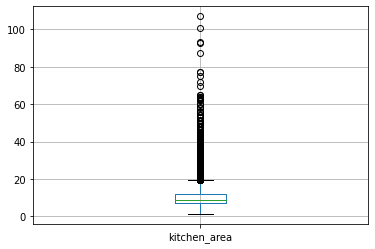

In [29]:
df[~(df.studio | df.open_plan)].boxplot(column=['kitchen_area'])

In [30]:
df['kitchen_area'].isna().sum() #смортим значение всех пропусков

2227

<AxesSubplot:title={'center':'Площадь кухни'}, ylabel='Frequency'>

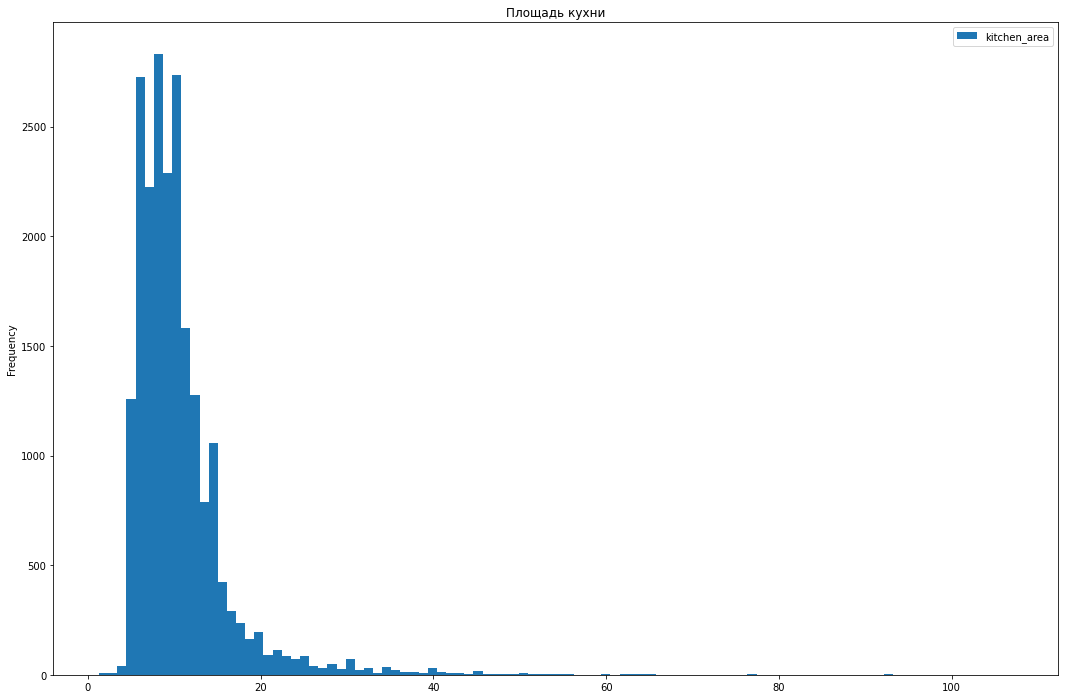

In [31]:
df[~(df.studio | df.open_plan)].plot(y='kitchen_area', title='Площадь кухни', kind='hist', bins=100, figsize=(18,12))

Ящик с усами и гистограмма позволяют сделать вывод, что для большинства квартир площадь кухни не превышает 20  м2 . Аномальными будем считать кухни с площадью более 60  м2 . Эти записи будут удаляться.

In [32]:
df.query('~(studio | open_plan) & (kitchen_area < 5 | kitchen_area > 60)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
76,12,2800000.0,55.1,2016-05-14T00:00:00,3,2.60,5,38.4,1,True,...,4.9,<NA>,Кировск,NaN,NaN,<NA>,NaN,<NA>,NaN,606.0
298,9,2650000.0,42.8,2017-04-25T00:00:00,2,2.64,5,30.0,3,True,...,4.5,0,Гатчина,NaN,NaN,<NA>,NaN,<NA>,NaN,49.0
422,8,1700000.0,55.2,2018-03-24T00:00:00,3,2.50,5,38.5,5,True,...,4.5,<NA>,Кириши,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
492,18,95000000.0,216.0,2017-12-05T00:00:00,4,3.00,5,86.0,4,True,...,77.0,<NA>,Санкт-Петербург,21740.0,436.0,2,138.0,3,620.0,14.0
906,15,2600000.0,27.0,2017-07-10T00:00:00,1,2.75,23,18.0,18,True,...,2.0,0,Санкт-Петербург,22131.0,17459.0,0,NaN,1,411.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22849,6,2380000.0,25.0,2016-03-22T00:00:00,1,2.64,25,19.0,15,True,...,4.0,1,посёлок Шушары,13461.0,19247.0,0,NaN,1,351.0,140.0
22980,19,24500000.0,155.4,2017-10-10T00:00:00,3,3.00,4,72.0,2,True,...,65.0,<NA>,Санкт-Петербург,43758.0,15461.0,1,756.0,2,278.0,325.0
23110,1,2900000.0,34.0,2018-02-01T00:00:00,2,2.90,2,20.0,1,True,...,4.0,<NA>,посёлок Стрельна,27006.0,23832.0,0,NaN,2,872.0,196.0
23498,7,1600000.0,54.0,2016-12-26T00:00:00,2,2.30,1,33.0,1,False,...,3.5,0,Высоцк,NaN,NaN,<NA>,NaN,<NA>,NaN,281.0


In [33]:
df.drop(df[~(df.studio | df.open_plan) & ((df.kitchen_area < 5) | (df.kitchen_area > 60))].index, inplace=True)
df.query('~(studio | open_plan) & (kitchen_area < 5 | kitchen_area > 60)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [34]:
df['kitchen_area'].isna().sum()

2227

In [35]:
dt = np.where(df[df.kitchen_area.isnull()]['total_area']*0.2-5 > 5, df[df.kitchen_area.isnull()]['total_area']*0.2-5, 5 )
miss_value = pd.Series(dt, index = df[df.kitchen_area.isnull()]['total_area'].index)
df['kitchen_area'] = df['kitchen_area'].fillna(miss_value)

In [36]:
df['kitchen_area'].isna().sum()

0

Теперь мы возвращаемся к замене пропусков в графе жилая площадь `living_area`

In [37]:
df['living_area'] = df['living_area'].fillna(df['total_area'] - (df['kitchen_area'] + 5))
df['living_area'].isna().sum()

0

**2.3.5 посмотрим на этажность `floor`**

In [38]:
df['floor'].unique()

array([ 8,  1,  4,  9, 13,  5, 22, 26,  7,  3,  2, 11, 15, 18,  6, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

На данном этапе проверим, нет ли противоречий в данных `этаж` и `количество этажей` в доме. Пропуски будем заполнять позже.

In [39]:
df.query('floor>floors_total')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Данных, где номер этажа больше, чем всего этажей в доме нет, тут все корректно.

**2.3.6 `balcony` Посмотрим на число балконов**

Будем считать, что количество лоджий (которые тут явно тоже считают балконами) не больше количества комнат в квартире. Бывает, но редко, когда в одной комнате два балкона, балконы на кухне -- распространенная практика. 
Посчитаем количество записей, в которых количество балконов больше числа комнат + 2 (вдруг все-таки в комнате 2 балкона и еще и на кухне). Квартиры свободной планировки и студии не рассматриваем.  

In [40]:
df['balcony'].value_counts()

1    4122
0    3676
2    3583
5     300
4     179
3      80
Name: balcony, dtype: Int64

In [41]:
anomal_val = df[(~df.studio) & (~df.open_plan) & (df.balcony >= df.rooms+2)].shape[0]
if anomal_val != 0:
    df.drop(df[(~df.open_plan) & (~df.studio) & (df.balcony > df.rooms + 2)].index, inplace=True)
    print('Найдено {:d} записей с аномально большим количеством балконов. Записи удалены.'.format(anomal_val))
else:
    print('Не найдено записей с аномально большим количеством балконов.')

Найдено 350 записей с аномально большим количеством балконов. Записи удалены.


In [42]:
df['balcony'].value_counts()

1    4122
0    3676
2    3583
5     193
4     163
3      80
Name: balcony, dtype: Int64

Видим, что уменьшилось число записей, в которых по либо 4, либо по 5 балконов. Других гипотез по поиску аномалий в признаке balcony нет. Заполним пропуски по этому признаку 0, если не указано, значит балкона нет. Логика здесь такова: наличие балкона, как представляется, добавляет ценности квартире и делает ее более привлекательной. Следовательно, если балкон есть, то для повышения привлекательно предложения его надо указывать.

In [43]:
df.balcony.fillna(0, inplace=True)
df['balcony'].isna().sum()

0

**2.3.7 `airports_nearest`	расстояние до ближайшего аэропорта в метрах (м)**

По нормам, которые были приняты ранее, нельзя строить жилье ближе 30 км от здания аэропорта, ближе нужно согласовывать. Видимо минимальным предельно допустимым является расстояние до аэропорта 5 км. Будем искать аномальные наблюдения согласно этой информации.

In [44]:
df[df.airports_nearest < 5000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9,19.8,3,True,...,6.0,2,Санкт-Петербург,0.0,22801.0,0,NaN,0,NaN,60.0


Это единственный объект - удалим его. про максимальное значение ничего сказать нельзя, т.к возможно есть объекты очень далеко от Аэропорта. 

Что бы восстанавливать значение в этом пункте, допустим, что это расстояние примерно равное для всех квартир, находящихся в одном населенном пункте. Что бы с этим работать, нужно упорядочить названия насленных пунктов и посмотреть нет ли там не явных дубликатов. (т.к. одинаковые вводимые названия могут быть введены по разному)

In [45]:
df.drop(df[df.airports_nearest < 5000].index, inplace=True)

**3 Замена пропусков**

Укажим еще раз, где это требуется и где мы это уже сделали на предыдущем этапе.

|№|Признак|Расшифровка|Что сделано или еще нужно сделать|
|-:|-------------:|:------------|:------------|
|4|first_day_exposition|дата публикации|тип признака  требуется сменить на тип дата|
|6|ceiling_height|высота потолков(м)|отсекли недостоверные данные, сделана замена пропусков|
|7|floors_total|всего этажей в доме| имеется небольшое число пропусков; максимальный этаж -- 60, требуется коррекция| 
|8|living_area|жилая площадь в квадратных метрах(м²)|сделана замена пропусков, убрали аномалии|
|9|floor|этаж| проверили, нет ошибок, этаж везде больше или равен количеству этажей в доме |
|10|is_apartment|апартаменты (булев тип)|пропусков много, но возможно это просто указание того, что это не апартаменты, проверим|
|11|kitchen_area|площадь кухни в квадратных метрах (м²)|сделана замена пропусков, убрали аномалии|
|12|balcony|число балконов|сделана замена пропусков, убрали возможные ошибки в данных|
|13|locality_name|название населённого пункта|имеются малочисленные пропуски, требуется коррекция названий|
|14|airports_nearest|расстояние до ближайшего аэропорта в метрах (м)|убрана аномалия, требуется замена пропусков|
|15|cityCenters_nearest|расстояние до центра города (м)|имеются пропуски|
|16|parks_around3000|число парков в радиусе 3 км|имеются пропуски|
|17|parks_nearest|расстояние до ближайшего парка (м)|имеются пропуски в данных|
|18|ponds_around3000|число водоёмов в радиусе 3 км|имеются пропуски|
|19|ponds_nearest|расстояние до ближайшего водоёма (м)|имеются пропуски|
|20|days_exposition|сколько дней было размещено объявление (от публикации до снятия)|имеются пропуски|


** `first_day_exposition` дата публикации, сменим тип данных**

In [46]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

**3.1 `locality_name` название населённого пункта. Будем проверять корректность значений.** 

*Для изменения данных в порядке нашего списка нужно сначала провести это преобразование, т.к. название населенного пункта нам понадобится для работы. Поэтому порядок немного нарушится.*

Оценим количество пропусков

In [47]:
df['locality_name'].isna().sum()

48

Построим распределение объявлений по населенным пунктам

In [48]:
df['locality_name'].value_counts()

Санкт-Петербург          15342
посёлок Мурино             491
посёлок Шушары             422
Всеволожск                 389
Пушкин                     360
                         ...  
деревня Кривко               1
посёлок Мыза-Ивановка        1
поселок Кирпичное            1
поселок Калитино             1
село Шум                     1
Name: locality_name, Length: 361, dtype: int64

Обратим внимание, что тип населеного пункта "поселок" пишется либо через "е", либо через "ё". В целях унификации везде заменим "ё" на "е", ну и "Ё" на "Е".

In [49]:
df['locality_name'] =df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace('Ё', 'Е')
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'поселок Парголово', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Иванг

Видим, что в названии некоторых населенных пунктов, типы населенных пунктов содержат смысловые синонимы:

поселок  <--- городской поселок, городского типа, городской, коттеджный 

деревня (деревень больше) <--- село

садовое товарищество <--- садоводческое некоммерческое товарищество

В целях унификации проведем замену. 

In [50]:
df['locality_name'] = df['locality_name'].str.replace('городской ', '')
df['locality_name'] = df['locality_name'].str.replace(' городского типа', '')
df['locality_name'] = df['locality_name'].str.replace('коттеджный ', '')
df['locality_name'] = df['locality_name'].str.replace(' при железнодорожной', '')
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое', 'садовое')
df['locality_name'] = df['locality_name'].str.replace('село ', 'деревня ')
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'поселок Парголово', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'деревня Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'деревня Оржицы'

In [51]:
df['locality_name'].value_counts()

Санкт-Петербург       15342
поселок Мурино          522
поселок Шушары          422
Всеволожск              389
Пушкин                  360
                      ...  
деревня Лупполово         1
поселок Рабитицы          1
поселок Кирпичное         1
деревня Снегиревка        1
деревня Терпилицы         1
Name: locality_name, Length: 316, dtype: int64

Заменим пропуски в этой категории модой, это `Санкт-Петербург`  

In [52]:
df['locality_name'] = df['locality_name'].fillna('Санкт-Петербург')
df['locality_name'].isnull().sum()

0

**Вернемся к проверке неявных дубликатов.**

Сначала проверим, не появились ли они после приведения названия населенных пунктов к единообразию.

In [53]:
df.duplicated().sum()

0

Проверим, есть ли дубликаты, если не брать во внимание название населенного пункта вообще. Названий много, и проверять их вручную сложно. За основу такой проверки берем гипотезу, что вероятность одинаковых объектов (с одинаковыми георграфическими параметрами (расстояние до водоемов, парков, аэропорта, центра города) в разных населенных пунктах равна нулю. Поэтому будем проверять наличие дубликатов, игнорируя населенный пункт.

In [54]:
df_new = df.drop('locality_name', axis=1)

In [55]:
df_new.duplicated().sum()

0

Дублирующих записей не обнаружено.

**3.4 `floors_total` Этажность дома**

Аномальные значения отберем до ящику и гистограмме.

Пропущенные значения этажности дома заменим медианой этажности всех домов, находящихся в одном населенном пункте домом, у которого этажность пропущена.

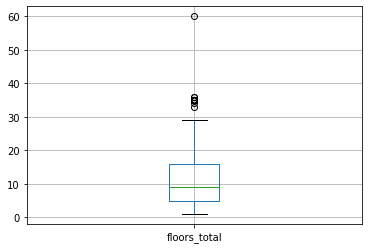

In [56]:
df.boxplot(column=['floors_total']);

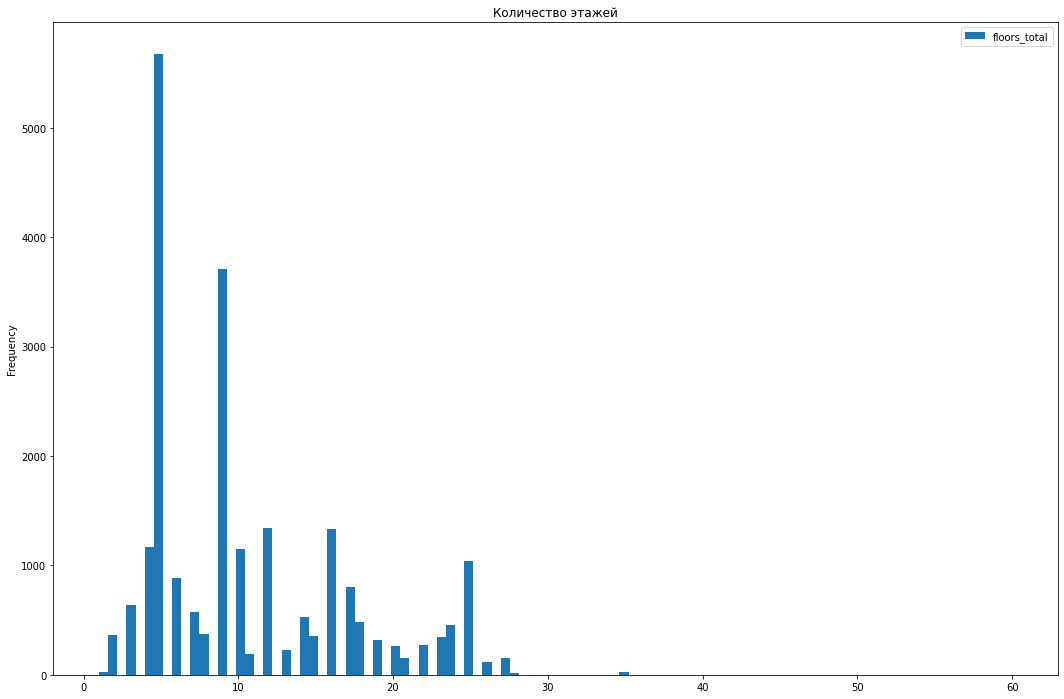

In [57]:
df.plot(y='floors_total', title='Количество этажей', kind='hist', bins=100, figsize=(18,12));

Нет зданий с числом этажей, равным 0. Можно сказать, что здания с количеством этажей больше 30 это очень большая редкость.

In [58]:
df.query('floors_total >= 30')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22,2,2.64,36,21.4,28,True,...,18.7,1,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,11.0
871,14,7777777.0,75.0,2017-11-16,2,2.64,35,40.5,23,True,...,11.7,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,169.0
1060,10,5200000.0,50.0,2015-11-06,2,2.64,35,39.0,15,False,...,20.5,2,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,281.0
1697,11,3550000.0,28.0,2018-02-08,1,2.65,34,18.0,23,True,...,5.0,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,410.0
1917,13,10150000.0,74.0,2017-11-17,2,2.80,35,34.4,30,True,...,13.0,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,NaN
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,True,...,7.4,0,Кронштадт,67763.0,49488.0,2,342.0,3,614.0,166.0
2966,9,4300000.0,37.0,2017-08-08,1,2.64,35,14.0,15,True,...,10.4,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,50.0
4855,12,5500000.0,50.0,2017-06-22,1,2.80,35,22.0,4,True,...,13.0,0,Санкт-Петербург,18627.0,20339.0,1,609.0,3,145.0,537.0
5749,20,3590000.0,25.0,2017-08-30,0,2.80,35,15.0,26,True,...,5.0,2,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,198.0
5808,12,4590000.0,43.0,2018-10-19,1,2.64,35,14.0,11,True,...,15.0,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,82.0


In [59]:
df.drop(df[df.floors_total >= 30].index, inplace=True) #удалим их

In [60]:
df['floors_total'].isna().sum()

78

Замена пропущенных значений этажности дома медианой этажности всех домов, находящихся в одном населенном пункте.
Для этого нам придется временно вернуть тип данных в float, а после замены перевести обратно в int. Иначе мы не сможем расcчитать медиану.

In [61]:
df=df.astype({'floors_total':'float64'}, errors='ignore')
df.floors_total.dtypes

dtype('float64')

In [62]:
df['floors_total'] = df.groupby('locality_name')['floors_total'].transform(lambda x: x.fillna(x.median()).round())

In [63]:
df=df.astype({'floors_total':'int64'}, errors='ignore')
df.floors_total.dtypes

dtype('int64')

In [64]:
df['floors_total'].isna().sum()

0

**4.4 `is_apartment`	апартаменты (булев тип)**

По данному признаку очевидной представляется гипотеза, что если для квартиры пропущено значение этого признака, то это не апартаменты. Отталкиваясь от этой гипотезы, заполним пропуски по этому признаку значениями False. Проверим цепочкой .isna().sum() отсутствие пропусков и методом .unique() посмотрим уникальные значения признака.

In [65]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].isna().sum()


0

In [66]:
list(df['is_apartment'].unique())

[True, False]

**4.5 `airports_nearest` расстояние до ближайшего аэропорта в метрах (м)**

В качестве рабочей примем гипотезу, что для квартир, находящихся в одном населенном, расстояние до ближайшего аэропорта будет "примерно" одинаковым. 

In [67]:
df['airports_nearest'].isna().sum()

5374

In [68]:
df['airports_nearest'] = df.groupby('locality_name')['airports_nearest'].transform(lambda x: x.fillna(x.mean()))

In [69]:
df['airports_nearest'].isna().sum()

4738

Для оставшихся записей расстояние до ближайшего аэропорта положим равным максимальному расстоянию в выборке. Если не указано расстояние, значит аэропорт далеко. Предварительно посмотрим для квартир из каких населенных пунктов неизвестно расстояние до аэропорта.

In [70]:
df[df['airports_nearest'].isna()]['locality_name'].unique()

array(['поселок Янино-1', 'Сертолово', 'деревня Кудрово', 'Коммунар',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кировск', 'деревня Новое Девяткино', 'поселок Лебяжье',
       'поселок Сиверский', 'поселок Молодцово', 'поселок Кузьмоловский',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Сясьстрой',
       'деревня Старая', 'деревня Лесколово', 'поселок Новый Свет',
       'Сланцы', 'деревня Путилово', 'Ивангород', 'Мурино',
       'Шлиссельбург', 'Никольское', 'Сосновый Бор', 'деревня Оржицы',
       'деревня Кальтино', 'Кудрово', 'поселок Романовка',
       'поселок Бугры', 'поселок Рощино', 'Луга', 'Волосово', 'Отрадное',
       'деревня Павлово', 'поселок Оредеж', 'деревня Копорье', 'Тихвин',
       'поселок Победа', 'деревня Нурма', 'поселок Синяви

In [71]:
max_dist = df['airports_nearest'].max()
df['airports_nearest'].fillna(max_dist, inplace = True)
df['airports_nearest'].isna().sum()

0

**4.6 Заполнение значений признака `cityCenters_nearest`** расстояние до центра города

При обработке пропусков по переменной `cityCenters_nearest` будем придерживаться той же стратегии, что для переменной `airports_nearest`: если известно в каком населенном пункте расположена квартира, то соответствующее значение заполним групповым средним известных расстояний до центра в этом населенном пункте; остальным пропущенным значениям будем присваивать максимальное значение расстояния.     

In [72]:
df['cityCenters_nearest'].isna().sum()

5353

Для известных населенных пунктов заполняем расстояние до центра групповыми средними.

In [73]:
df['cityCenters_nearest'] = df.groupby('locality_name')['cityCenters_nearest'].transform(lambda x: x.fillna(x.mean()))
df['cityCenters_nearest'].isna().sum()

4738

Оставшиеся значения по признаку `cityCenters_nearest` заполняем максимальным расстоянием до центра. 

In [74]:
max_dist = df['cityCenters_nearest'].max()
df['cityCenters_nearest'].fillna(max_dist, inplace = True)
df['cityCenters_nearest'].isna().sum()

0

**4.7 Заполнение значений признаков `parks_nearest` и `parks_around3000`, `ponds_nearest` и `ponds_around3000`**

Будем считать, что пары признаков, отвечающие за парки и водоемы нужно обрабатывать вместе. Именно признаки каждой пары. Видимо ценность квартиры определяется, в том числе, шаговой (3 км) доступностью парков и водоемов. Отталкиваясь от этой гипотезы и будем проводить работы по поиску и обработке аномалий, а также последующему заполнению пропусков.

Заполнение значений признаков `parks_nearest` и `parks_around3000`

Посмотрим сколько парков за пределами 3 км.

In [75]:
df[df.parks_nearest > 3000]['parks_nearest'].value_counts()

3190.0    2
3064.0    1
3013.0    1
Name: parks_nearest, dtype: int64

Этих парков всего 4 штуки, находящихся на удалении 13, 64 и 190 м от заветной границы в 3 км. 
Заменим эти 4 значения на 3000, пропуски пока оставим. 

In [76]:
df.parks_nearest.where(df.parks_nearest.isna() | (df.parks_nearest <=3000), other=3000, inplace=True)
df[df.parks_nearest > 3000]['parks_nearest'].value_counts()

Series([], Name: parks_nearest, dtype: int64)

С аномалиями в `parks_nearest`мы разобрались. Займемся `parks_around3000`. Проверим, а нет ли записей, для которых в `parks_around3000` пропущенные значения, но расстояние до парка известно. Если такие записи есть, то для них заполним значение признака `parks_around3000` 1 (если расстояние известно, то хотя бы один парк должен быть).

In [77]:
mis_val = df[df.parks_nearest.notna()]['parks_around3000'].isna().sum()
if mis_val != 0:
    df.parks_around3000 = df[data.parks_nearest.notna()].parks_around3000.fillna(1)
    print('Гипотеза подтвердилась. Заполнено {: d} значений признака parks_around3000'.format(mis_val))
else:
    print('Гипотеза не подтвердилась')

Гипотеза не подтвердилась


Таких записей нет, позже проверим водоемы по такому же принципу. 
Повторим это, только в обратном направлении. У записи проверим наличие парков в радиусе 3 км (`parks_around3000`), если такие есть, а поле по переменной `parks_nearest` пустое, то заполним его значением 3000.

In [78]:
mis_val = df[df.parks_around3000.notna()]['parks_nearest'].isna().sum()
if mis_val != 0:
    df.parks_nearest =df[df.parks_around3000.notna()].parks_nearest.fillna(3000)
    print('Гипотеза подтвердилась. Заполнено {: d} значений признака parks_nearest'.format(mis_val))
else:
    print('Гипотеза не подтвердилась')

Гипотеза подтвердилась. Заполнено  9823 значений признака parks_nearest


In [79]:
df[['parks_nearest', 'parks_around3000']].isna().sum()

parks_nearest       5352
parks_around3000    5352
dtype: int64

Больше никаких гипотез относительно признаков `parks_nearest` и `parks_around3000` нет. Заполним оставшиеся пропуски по признаку `parks_around3000` значением 0 (нет парков в радиусе 3 км), а по признаку `parks_nearest` пропуски заменим значением 5000 (в шаговой доступности парков нет). Почему выбрана такая стратегия заполнения: к настоящему времени исчерпана вся информация по этой паре признаков, если парков нет, то и дойти пешком до них нельзя. Ну и традиционная проверка. 

In [80]:
df['parks_around3000'].fillna(0, inplace=True)
df['parks_nearest'].fillna(5000, inplace=True)
df[['parks_nearest', 'parks_around3000']].isna().sum()

parks_nearest       0
parks_around3000    0
dtype: int64

Заполнение значений признаков `ponds_nearest` и `ponds_around3000`

Обработку этих признаков проведем по той же схеме, что для признаков `parks_nearest` и `parks_around3000`. 

In [81]:
df[df.ponds_nearest > 3000]['ponds_nearest'].value_counts()

Series([], Name: ponds_nearest, dtype: int64)

водоемов дальше 3 км нет.

Проверим наличие записей, для которых известно расстояние до водоема, а число водоемов не указано. И в обратную сторону.

In [82]:
mis_val = df[df.ponds_nearest.notna()]['ponds_around3000'].isna().sum()
if mis_val != 0:
    df.ponds_around3000 = df[df.ponds_nearest.notna()].ponds_around3000.fillna(1)
    print('Гипотеза подтвердилась. Заполнено {: d} значений признака ponds_around3000'.format(mis_val))
else:
    print('Гипотеза не подтвердилась')

Гипотеза не подтвердилась


In [83]:
mis_val = df[df.ponds_around3000.notna()]['ponds_nearest'].isna().sum()
if mis_val != 0:
    df.ponds_nearest = df[df.ponds_around3000.notna()].ponds_nearest.fillna(3000)
    print('Гипотеза подтвердилась. Заполнено {: d} значений признака ponds_nearest'.format(mis_val))
else:
    print('Гипотеза не подтвердилась')

Гипотеза подтвердилась. Заполнено  8884 значений признака ponds_nearest


Заполним оставшиеся пропуски по признаку `ponds_around3000` -- 0 (нет водоемов), а пропуски признака `ponds_nearest` -- 5000 (пешком дойти до водоема сложно)   

In [84]:
df['ponds_around3000'].fillna(0, inplace=True)
df['ponds_nearest'].fillna(5000, inplace=True)
df[['ponds_nearest', 'ponds_around3000']].isna().sum()

ponds_nearest       0
ponds_around3000    0
dtype: int64

**4.8 Заполнение значений признака `days_exposition`**

Никаких оригинальных гипотез относительно заполнения пропущенных значений этого признака нет. Применим все ту же стратегию: если известен населенный пункт, то заменим пропущенные значения числа дней размещения объявления групповым средним по этому населенному пункту; остальные значения заполним медианой, как статистикой более устойчивой к выбросам

In [85]:
df['days_exposition'].isna().sum()

3096

In [86]:
df['days_exposition'] = df.groupby('locality_name')['days_exposition'].transform(lambda x: x.fillna(x.mean()))

In [87]:
df['days_exposition'].isna().sum()

63

In [88]:
median_days = df['days_exposition'].median()
df['days_exposition'].fillna(median_days, inplace = True)
df['days_exposition'].isna().sum()

0

проверяем, остались ли пропуски в данных

In [89]:
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

**Добавим в таблицу новые столбцы:**



    
|№|Новый столбец|название|Значение|
|-:|-------------:|:------------|:------------|
|1|цена кв. м.|price_square_meter|цена объекта `last_price`/общая площадь квартиры `total_area`|
|2|день публикации объявления|weekday_name| 0 - понедельник, 1 - вторник и т.д. |
|3|месяц публикации объявления|month_name|1 - январь, 2-февраль и т.д.|
|4|год публикации объявления|year_name | год в 4х значном формате|
|5|тип этажа квартиры |floor_type|значения — «первый», «последний», «другой»|
|6|расстояние в км до центра города|cityCenters_nearest_km  |cityCenters_nearest/1000  |
    
    
 

**4.9 цена кв. метра**

In [90]:
df['price_square_meter']=(df['last_price'] / df['total_area']).round(2)

**4.10 День недели, месяц и год публикации объявления**
- для выделения дня недели публикации объявления воспользуется методом `.weekday`, возращающим названия дней недели, 
- для выделения месяца публикации объявления воспользуется методом `.month`, возвращающим номер месяца. 
- для выделения года публикации объявления воспользуется методом `.year`.

In [91]:
# выделение дня
df['weekday_name'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df[['first_day_exposition', 'weekday_name']].head()

,first_day_exposition,weekday_name
0,2019-03-07,3
1,2018-12-04,1
2,2015-08-20,3
3,2015-07-24,4
4,2018-06-19,1


In [92]:
# выделение месяца
df['month_name'] = pd.DatetimeIndex(df['first_day_exposition']).month
df[['first_day_exposition', 'weekday_name', 'month_name']].head()

,first_day_exposition,weekday_name,month_name
0,2019-03-07,3,3
1,2018-12-04,1,12
2,2015-08-20,3,8
3,2015-07-24,4,7
4,2018-06-19,1,6


In [93]:
# выделение года
df['year_name'] = pd.DatetimeIndex(df['first_day_exposition']).year
df[['first_day_exposition', 'weekday_name', 'month_name', 'year_name']].head()

,first_day_exposition,weekday_name,month_name,year_name
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018


**4.11 тип этажа** 

Созадим новый столбец, который будет принимать значения «первый», «последний», «другой», в зависимости от этажа квартиры. 

Для этого создадим вспомогательную функцию, которая будет принимать аргументами этаж и количество этажей в доме.

In [94]:
def get_floor_type(floor, floors_total):
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [95]:
df['floor_type'] = df[['floor', 'floors_total']].apply(lambda s: get_floor_type(*s), axis=1)

In [96]:
df[['floor_type','floor', 'floors_total']].head()

,floor_type,floor,floors_total
0,другой,8,16
1,первый,1,11
2,другой,4,5
3,другой,9,14
4,другой,13,14


**4.12 расстояние в км до центра города**

In [97]:
df['cityCenters_nearest_km']=(df['cityCenters_nearest']/1000).round()

Посмотрим добавленные столбцы

In [98]:
df[['price_square_meter', 'weekday_name','month_name' ,'year_name', 'floor_type', 'cityCenters_nearest_km']].head(10)

,price_square_meter,weekday_name,month_name,year_name,floor_type,cityCenters_nearest_km
0,120370.37,3,3,2019,другой,16.0
1,82920.79,1,12,2018,первый,19.0
2,92785.71,3,8,2015,другой,14.0
3,408176.10,4,7,2015,другой,7.0
4,100000.00,1,6,2018,другой,8.0
5,95065.79,0,9,2018,другой,66.0
7,110544.69,3,4,2019,другой,12.0
8,87454.76,2,5,2018,другой,22.0
9,88524.59,6,2,2017,другой,15.0
10,127525.25,3,11,2017,другой,14.0


## Выводы по шагу 2

1. Проведена проверка на дубликаты и неявные дубликаты
2. Поиск аномалий значительно облегчается с помощью визуализаций. Перед восттановлением данных аномалии должны быть обработаны.
3. Порядок восстанавливаемых переменных важен.
4. Стратегия восстанавливаемых переменных требует дополнительных знаний (пришлось обращаться к строительной документации)
5. Тип признака определяется его содержанием. Отталкиваясь от этого правила, у ряда признаков поменяли типы данных. 
6. Данные востановлены, можно переходить к дальнейшим исследованиям.

## 3. Исследовательский анализ данных

В первую очередь построим гистограммы для следующих параметров и проанализируем их:

|№|название столбца|Значение|
|-:|-------------:|:------------|
|1|total_area|общая площадь|
|2|living_area|жилая площадь|
|3|kitchen_area|площадь кухни|
|4|last_price|цена объекта|
|5|rooms|количество комнат|
|6|ceiling_height|высота потолков|
|7|floor|этаж квартиры|
|8|floor_type|тип этажа квартиры («первый», «последний», «другой»)|
|9|floors_total|общее количество этажей в доме|
|10|cityCenters_nearest|расстояние до центра города в метрах|
|11|airports_nearest|расстояние до ближайшего аэропорта|
|12|parks_nearest|расстояние до ближайшего парка|
|13|weekday_name|день публикации объявления|
|14|month_name|месяц публикации объявления|
|15|price_square_meter|цена кв метра |



Т.к. вывдод гистограм для этих параметров аналогичный, то сделаем его в цикле, для этого создадим словарь с значениями параметров и их переводов на русский язык, для лучшего восприятия

In [99]:
colums = {'total_area':'общая площадь', 'living_area':'жилая площадь', 'kitchen_area':'площадь кухни', \
          'last_price':'цена объекта', 'price_square_meter': 'цена кв метра','rooms':'количество комнат', 'ceiling_height':'высота потолков', \
          'floor':'этаж квартиры', 'floors_total':'общее количество этажей в доме',\
          'cityCenters_nearest':'расстояние до центра города в метрах', 'airports_nearest':'расстояние до ближайшего аэропорта',\
          'parks_nearest':'расстояние до ближайшего парка','weekday_name':'день публикации объявления','month_name':'месяц публикации объявления'}

In [100]:
'''  вывод для одной позиции, на основании его сделан цикл
df['total_area'].plot(kind="hist", title='общая площадь',bins=100,figsize=(16,8), range = (0, df['total_area'].max()), label = 'общая площадь' );
plt.axvline(x=df['total_area'].mean(), color='r', linestyle='--' , label = f'Выборочное среднее: {df["total_area"].mean():.02f}')
plt.axvline(x=df['total_area'].median(), color='g', linestyle='--', label = f'Медиана: {df["total_area"].median():.02f}' )
plt.legend()
plt.show()
                 
'''

'  вывод для одной позиции, на основании его сделан цикл\ndf[\'total_area\'].plot(kind="hist", title=\'общая площадь\',bins=100,figsize=(16,8), range = (0, df[\'total_area\'].max()), label = \'общая площадь\' );\nplt.axvline(x=df[\'total_area\'].mean(), color=\'r\', linestyle=\'--\' , label = f\'Выборочное среднее: {df["total_area"].mean():.02f}\')\nplt.axvline(x=df[\'total_area\'].median(), color=\'g\', linestyle=\'--\', label = f\'Медиана: {df["total_area"].median():.02f}\' )\nplt.legend()\nplt.show()\n                 \n'

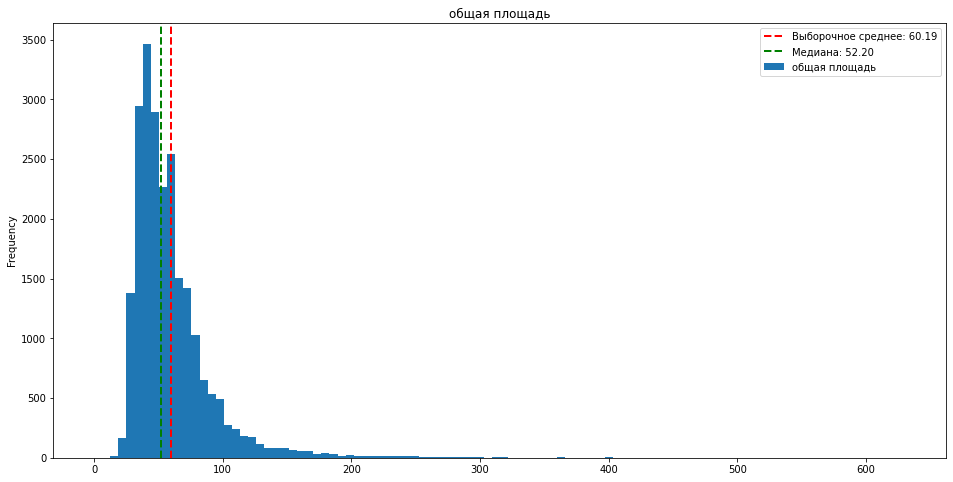

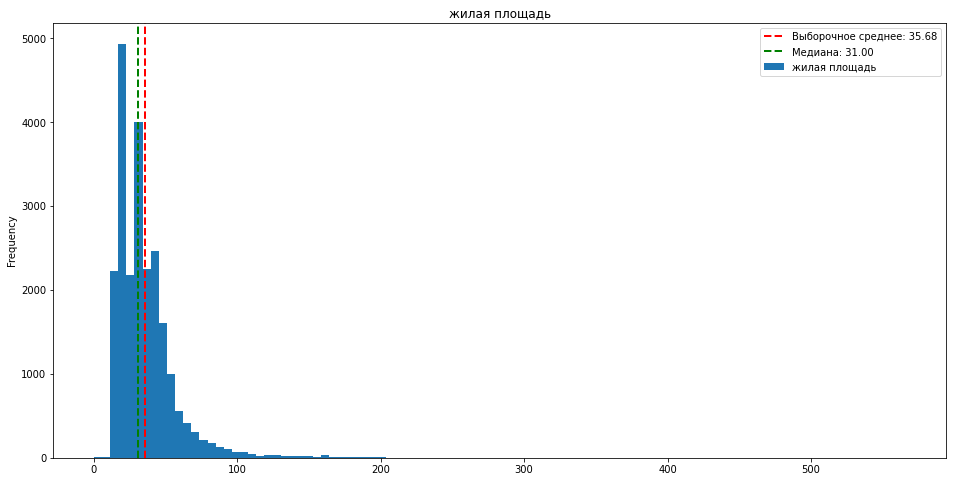

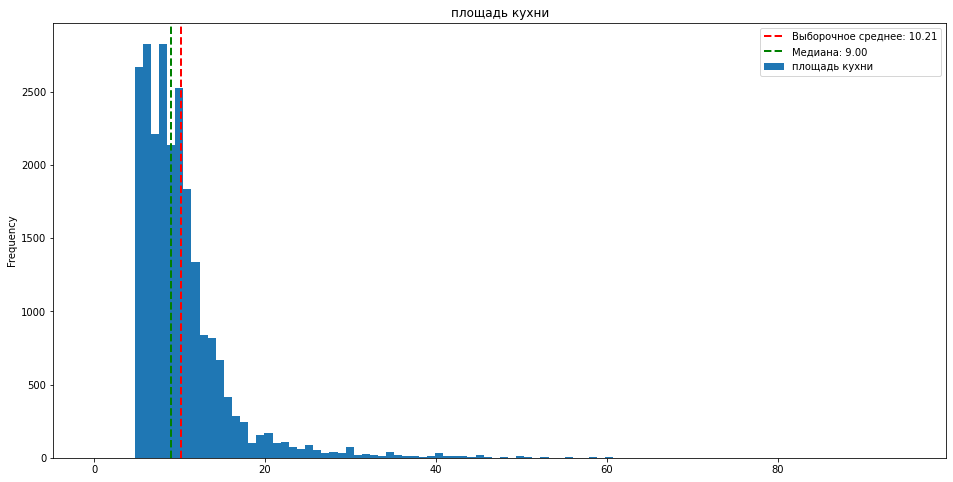

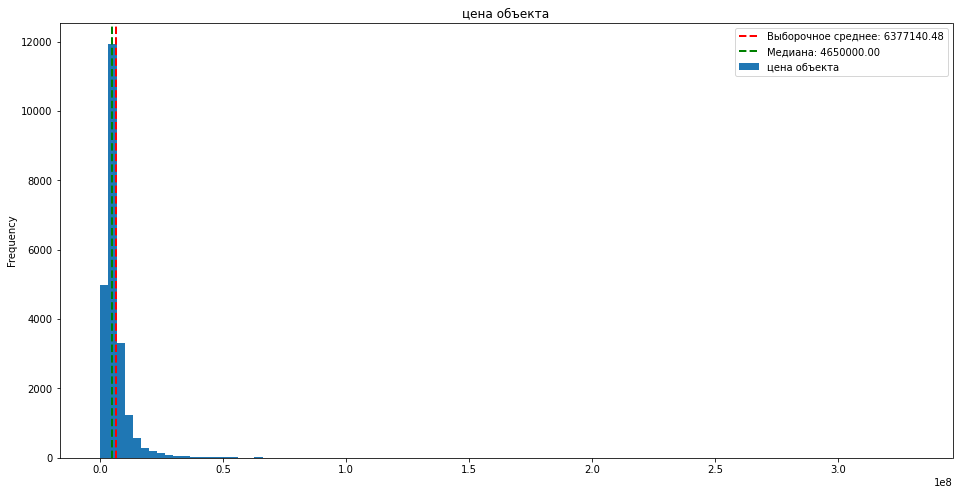

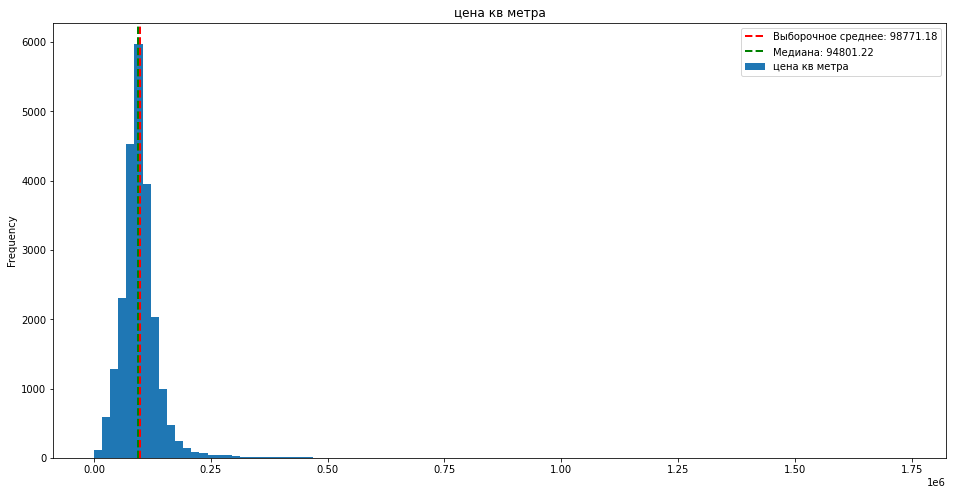

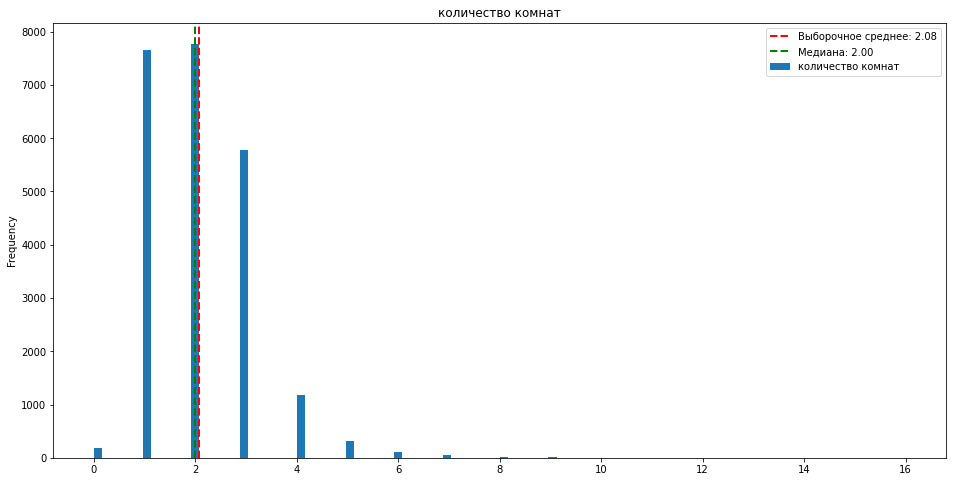

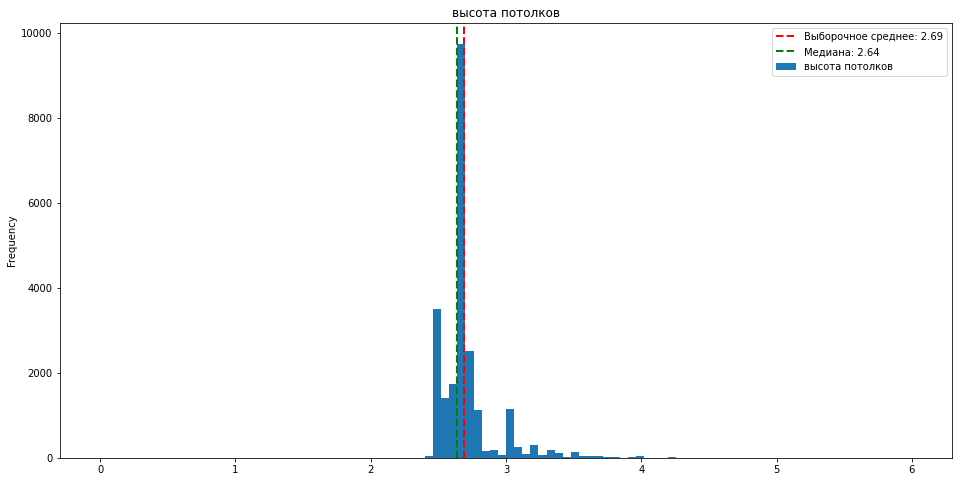

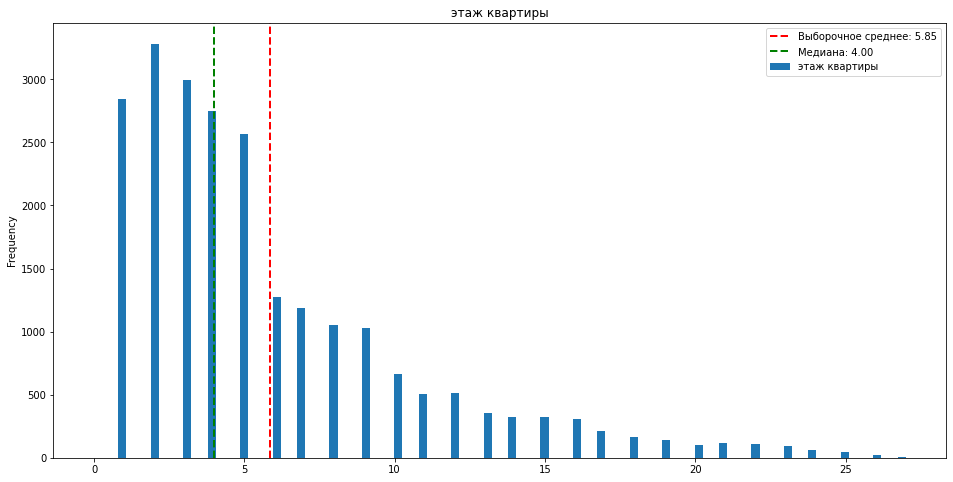

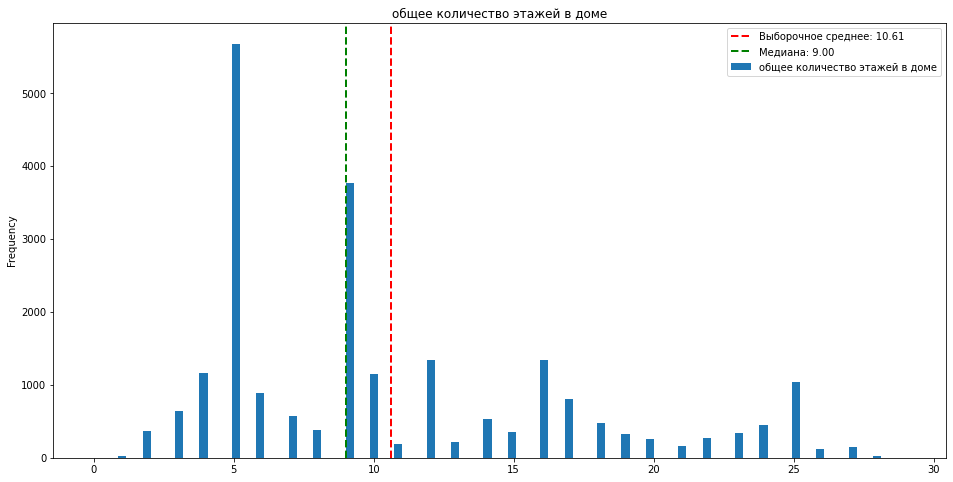

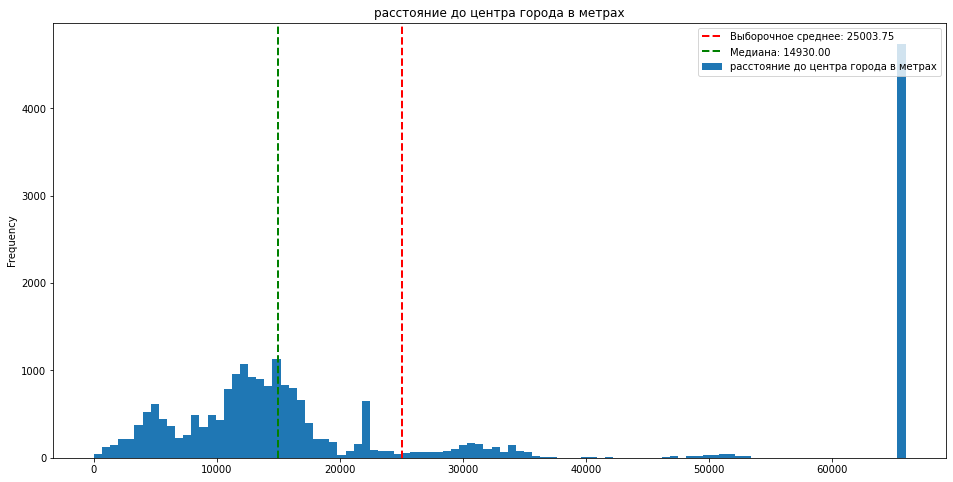

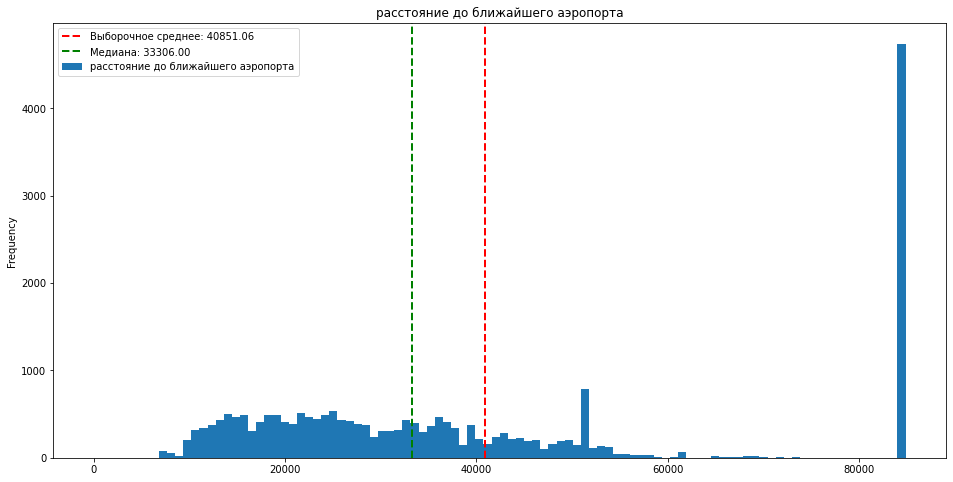

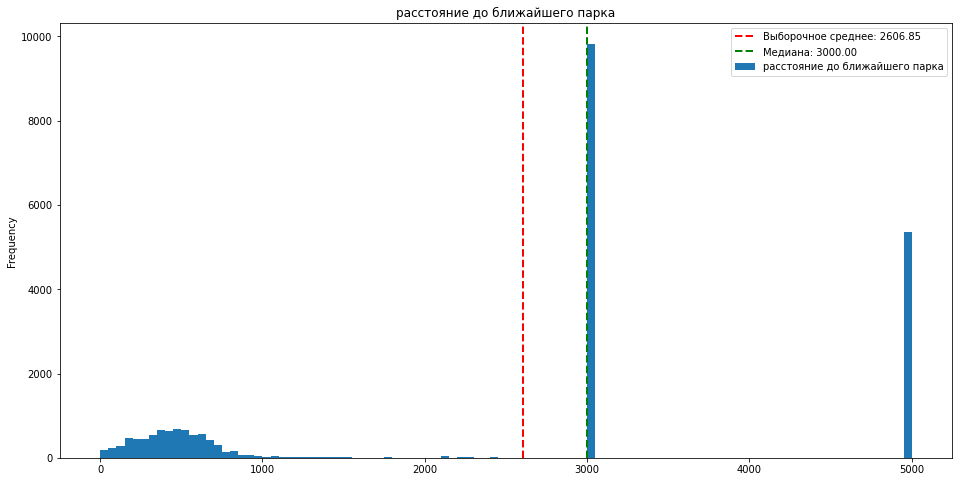

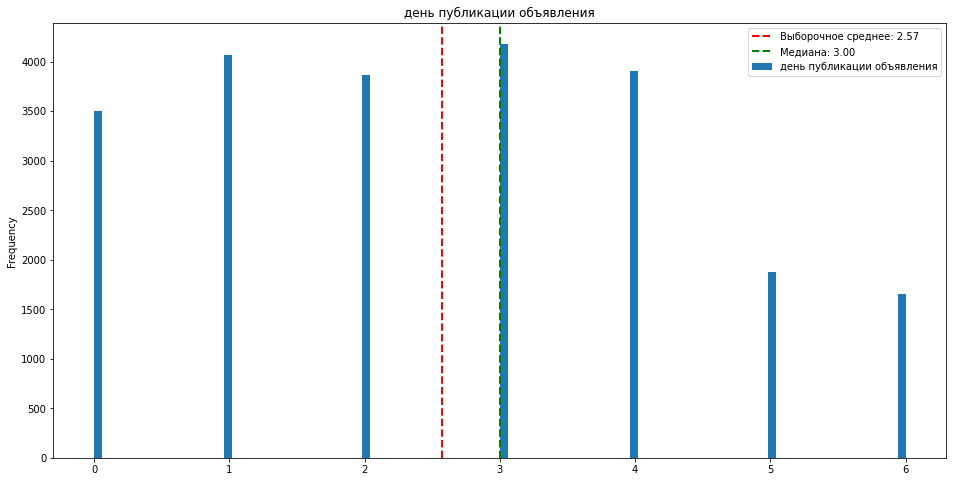

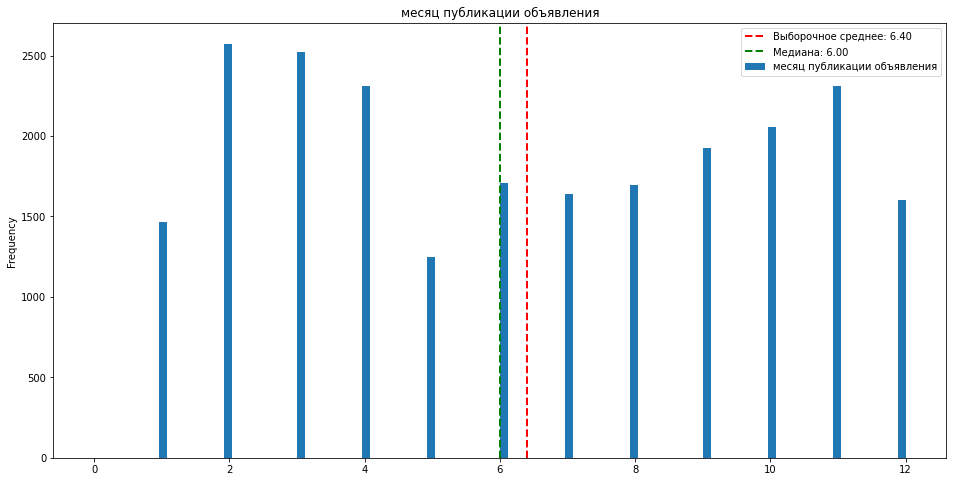

In [101]:
for i,j in zip(list(colums.keys()), list(colums.values())):
    df.plot(y=i, title=j, kind='hist', bins=100, range = (0, df[i].max()), figsize=(16,8), label = j)
    plt.axvline(x=df[i].mean(), color='r', 
            linestyle='--', 
                linewidth=2, label=f'Выборочное среднее: {df[i].mean():.02f}')
    plt.axvline(x=df[i].median(), color='g', linestyle='--', linewidth=2,
                    label=f'Медиана: {df[i].median():.02f}')
    
    plt.legend()
    plt.show()

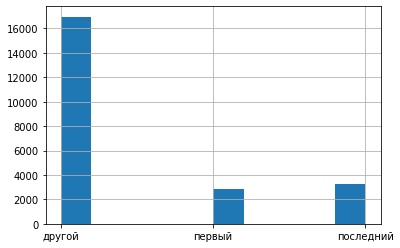

In [102]:
df['floor_type'].hist();

**Выводы по гистограммам:** 
 - В среднем в нашей выборке представлены небольшие квартиры ~ 52-54 кв.м.
 - Средняя жилая площадь ~ 32 кв.м.
 - Средняя площадь кухни 9 кв.м.
 - Средняя цена объекта ~ 4.6 млн.руб.
 - средняя цена кв.м. - 95 тыщ  руб.
 - преобладают 1 и 2х комнатные квартиры
 - высота потолков чаще всего 2,64 м
 - чаще всего встречаются квартиры не выше 5 го этажа
 - Больше всего 5ти этажных домов, на 2м месте 9ти этажные
 - в среднем от центра города объекты расположены на расстоянии 15 км
 - до ближайшего аэропорта расстояние 33 км
 - до ближайшего парка расстояние 3 км
 - публикации чаще всего делали на буднях
 - чаще всего объявления делали в начале года (после праздников и после лета, с увеличением в концу года)
 - больше всего квартир продавалось в середине дома. Меньше всего на первых этажах

Для более детальных выводов про дни недели, месяцы и годы желательно провести колличественные измерения и построить другие графики.

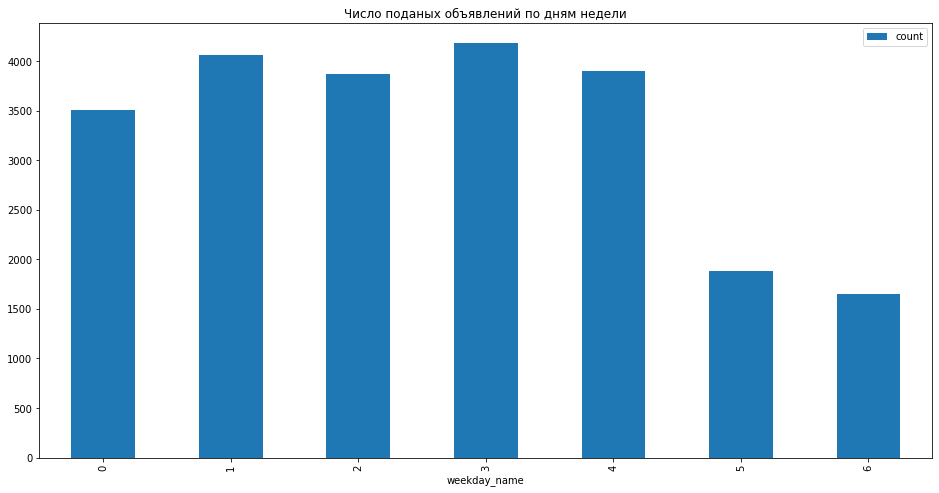

In [103]:
df.groupby('weekday_name').agg(count=('weekday_name', 'count')).plot(y='count', kind='bar', 
                                                                 figsize=(16,8), 
                                                                 title='Число поданых объявлений по дням недели',); 

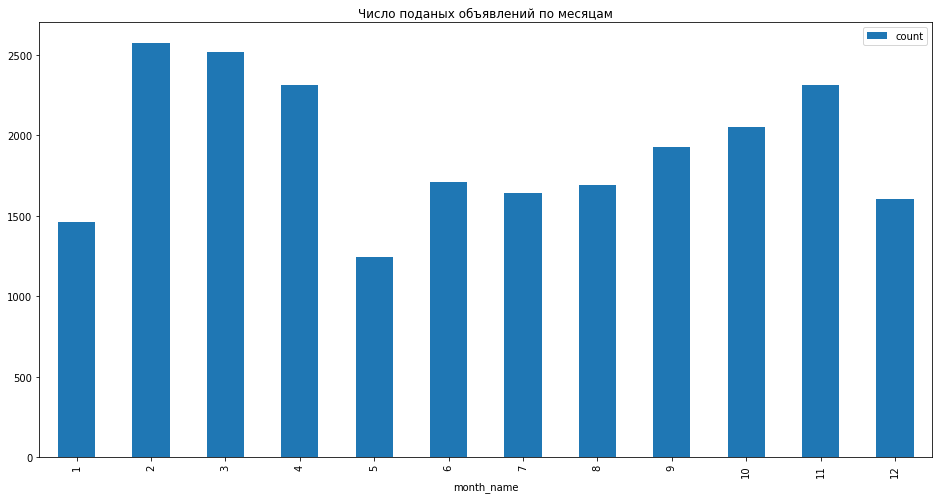

In [104]:
df.groupby('month_name').agg(count=('month_name', 'count')).plot(y='count', kind='bar', 
                                                                 figsize=(16,8), 
                                                                 title='Число поданых объявлений по месяцам',); 

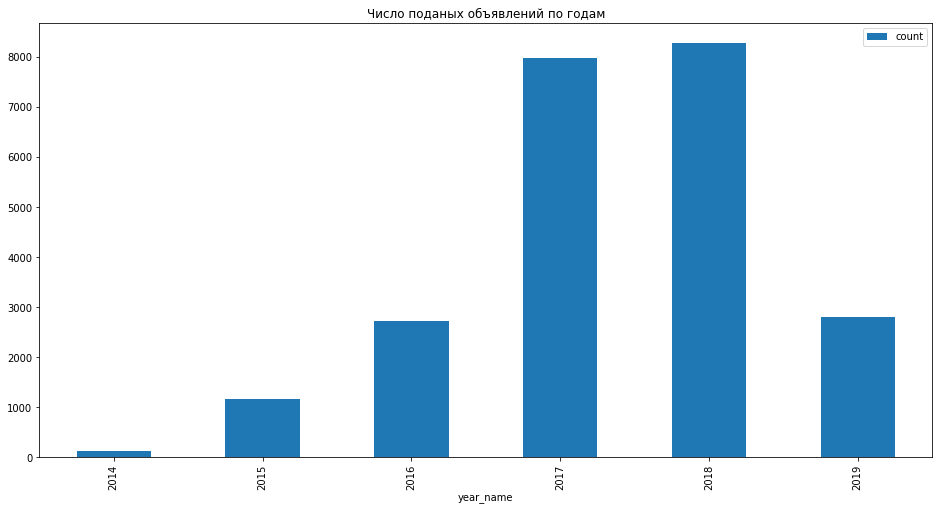

In [105]:
df.groupby('year_name').agg(count=('year_name', 'count')).plot(y='count', kind='bar', 
                                                                 figsize=(16,8), 
                                                                 title='Число поданых объявлений по годам',); 

Посмотрим на параметр как быстро продавалась квартира `days_exposition`

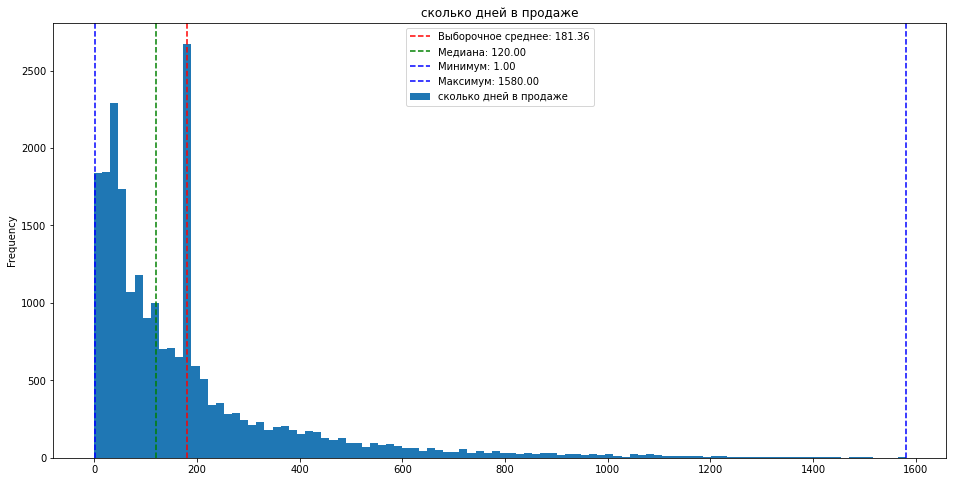

In [106]:
df['days_exposition'].plot(kind="hist", title='сколько дней в продаже',bins=100,figsize=(16,8), range = (0, df['days_exposition'].max()), label = 'сколько дней в продаже' );
plt.axvline(x=df['days_exposition'].mean(), color='r', linestyle='--' , label = f'Выборочное среднее: {df["days_exposition"].mean():.02f}')
plt.axvline(x=df['days_exposition'].median(), color='g', linestyle='--', label = f'Медиана: {df["days_exposition"].median():.02f}' )
plt.axvline(x=df['days_exposition'].min(), color='b', linestyle='--', label = f'Минимум: {df["days_exposition"].min():.02f}' )
plt.axvline(x=df['days_exposition'].max(), color='b', linestyle='--', label = f'Максимум: {df["days_exposition"].max():.02f}' )

plt.legend()
plt.show()

В среднем квартира продается за 120 дней ( 4 месяца). Есть достаточно большое количество быстрых продаж - объявление висит только 1 день. Самый долго продаваемый объект 1580 дней ~ 3,5 года

Дополнительно построим круговую диаграмму для года сделки --- признак year_name

<AxesSubplot:title={'center':'Число сделок по годам'}>

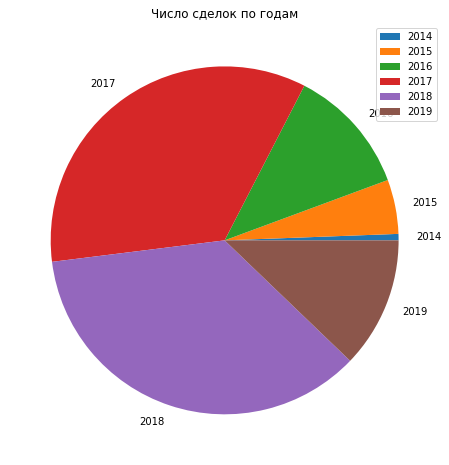

In [107]:
df.groupby('year_name').agg(count=('year_name', 'count')).plot(y='count', kind='pie', 
                                                                 figsize=(8,8), 
                                                                 title='Число сделок по годам',
                                                                label='')

На основании оценки данных, сократим количество объектов, удалив редко встречающиеся объекты (мало данных по признакам)
- год продажи 2014
- значения признака `total_area` (общая площадь) ограничим значением 190 кв.м.;
- в оставшихся квартирах будет не более 10 комнат -- признак `rooms`;
- высота потолка не более 4 м `ceiling_height`.
- время продажи не более 1200 дней 


In [108]:
# сделаем срез

df_itog = df[(df.total_area <= 190) &(df.rooms <= 10) & (df.ceiling_height <= 4) & 
                 (df.days_exposition <=1200) & (df.year_name >= 2015)].copy(deep=True)
print('Количество записей перед удалением -- {:d}.'.format(df.shape[0]))
print('Количество записей после удаления -- {:d}.'.format(df_itog.shape[0]))
print('Удалено {:.2%} записей.'.format((df.shape[0]-df_itog.shape[0])/df.shape[0]))

Количество записей перед удалением -- 23051.
Количество записей после удаления -- 22599.
Удалено 1.96% записей.


In [109]:
# востановим индексы
df_itog.index = range(df_itog.shape[0])
df_itog.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_name,month_name,year_name,floor_type,cityCenters_nearest_km
22594,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.00,8,True,...,352.0,1,675.0,239.000000,73717.95,4,8,2016,другой,34.0
22595,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.30,3,True,...,796.0,3,381.0,183.147593,72490.85,1,3,2017,другой,4.0
22596,14,3100000.0,59.00,2018-01-15,3,2.64,5,38.00,4,True,...,5000.0,0,5000.0,45.000000,52542.37,0,1,2018,другой,66.0
22597,18,2500000.0,56.70,2018-02-11,2,2.64,3,29.70,1,True,...,5000.0,0,5000.0,99.000000,44091.71,6,2,2018,первый,66.0
22598,13,11475000.0,76.75,2017-03-28,2,3.00,17,48.45,12,True,...,173.0,3,196.0,602.000000,149511.40,1,3,2017,другой,10.0


**Проверим, какие факторы больше всего влияют на общую (полную) стоимость объекта?**

Построим графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией соберем сводные таблицы для некоторых параметров.

- общей площади `total_area` ;
- жилой площади `living_area`;
- площади кухни `kitchen_area`;
- количество комнат `rooms`;
- типа этажа, на котором расположена квартира (первый, последний, другой) `floor_type`;
- даты размещения (день недели, месяц, год) `weekday_name` `month_name` `year_name`;

Для оценки зависимости площади (общей, жилой, кухни) построим матрицу диаграмм рассеивания и рассчитаем частные коэффициенты корреляции.

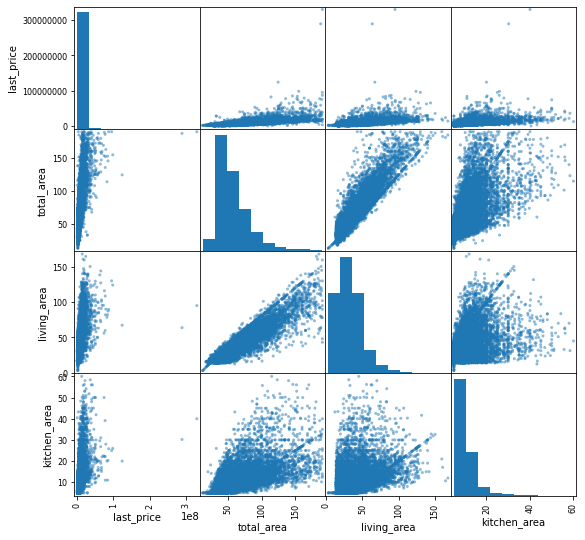

In [110]:
pd.plotting.scatter_matrix(df_itog[['last_price', 'total_area','living_area','kitchen_area']], figsize=(9, 9));

In [111]:
df_itog[['last_price', 'total_area','living_area','kitchen_area']].corr()

,last_price,total_area,living_area,kitchen_area
last_price,1.000000,0.657495,0.552286,0.519841
total_area,0.657495,1.000000,0.916238,0.605897
living_area,0.552286,0.916238,1.000000,0.373174
kitchen_area,0.519841,0.605897,0.373174,1.000000



**Вывод:** На диаграмме рассеивания (2-4 строка, первый  столбец) видно, что 
- точки, соответствующие **цене и площади**, вытянуты вдоль диагонали первого октанта, можно сделать вывод о наличии положительной линейной связи между эти признаки, чем больше площадь, тем выше цена. Этот вывод подтвержается и высоким коэффициентом частной корреляции между этими признаками $0.66$ для общей площади, $0.55$ для жилой и $0.51$ для площади кухни; 

- связь между жилой и общей площадью имеет очень высокий коэфициент кореляции $0.9$, ну это и логично. Чем больше общая площадь, тем больше и жилая.

- связь между площадью кухни и общей и жилой площадью имеет сильную зависимость на небольших площадах. Чем больше площадь, тем меньше сановится эта взаимосвязь (больше разброс значений)

**Общий промежуточный вывод**: факторы площади  оказывают влияние на цену квартиры, предпочтительнее квартиры большей площади. 

Расмотрим взаимосвязь между ценой и количеством комнат

In [112]:
pivot_total_rooms=df_itog.pivot_table(index=['rooms'], values='last_price', aggfunc=['median', 'count'])
pivot_total_rooms.columns=['median_price', 'count_price']
pivot_total_rooms

,median_price,count_price
rooms,,
0,2775000.0,182
1,3600000.0,7605
2,4750000.0,7709
3,6150000.0,5681
4,8725000.0,1100
5,12500000.0,249
6,13351000.0,55
7,16000000.0,17
8,16100000.0,1


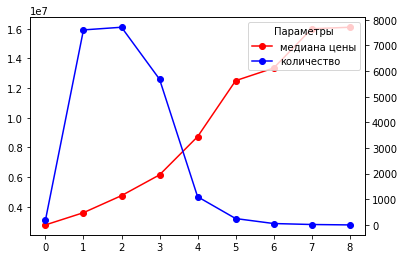

In [113]:
x=pivot_total_rooms.index
y1=pivot_total_rooms['median_price']
y2=pivot_total_rooms['count_price']
                    
fig, ax1=plt.subplots()  
ax2=ax1.twinx()

curve_price=ax1.plot(x,y1,label='медиана цены', color='red', marker='o')
curve_count=ax2.plot(x,y2,label='количество', color='blue', marker='o')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.get_legend()
ax2.legend(lines + lines2, labels + labels2, loc = 0, title = 'Параметры') 
plt.plot()
plt.show()

**Вывод:** Цена растет пропорционально количеству комнат (логично, чем больше комнат, тем больше площадь а с этим параметром есть прямая зависимость, мы это уже выяснили). Но количество продаж многокомнатных квартир значительно меньше, чем малокомнатных (максимальные значения 1 и 2х комнатные, потом 3х и далее, после 4х комнат оно резко уменьшается).

**Проверим параметр `floor_type` тип этажа**

In [114]:
pivot_total_area=df_itog.pivot_table(index=['floor_type'], values='last_price', aggfunc=['median', 'count'])
pivot_total_area.columns=['median_price', 'count_price']
pivot_total_area

,median_price,count_price
floor_type,,
другой,4800000.0,16665
первый,3900000.0,2801
последний,4250000.0,3133


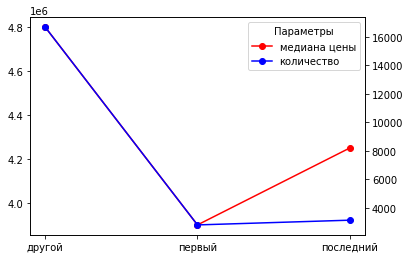

In [115]:
x=pivot_total_area.index
y1=pivot_total_area['median_price']
y2=pivot_total_area['count_price']
                    
fig, ax1=plt.subplots()  
ax2=ax1.twinx()

curve_price=ax1.plot(x,y1,label='медиана цены', color='red', marker='o')
curve_count=ax2.plot(x,y2,label='количество', color='blue', marker='o')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.get_legend()
ax2.legend(lines + lines2, labels + labels2, loc = 0, title = 'Параметры') 
plt.plot()
plt.show()

Построим другой график, более информативный. Признак last_price (цена) является интервальным, а признак floor_type (этаж, на котором находится квартира) является категориальным.

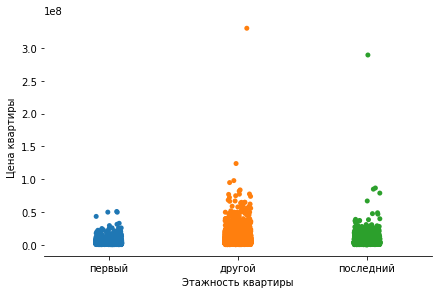

In [116]:
g = sns.catplot(x="floor_type", y="last_price", data = df_itog, 
                height=4,
                aspect=1.5,
                order = ['первый', 'другой', 'последний'])
(g.set_axis_labels("Этажность квартиры", "Цена квартиры")
  .despine(left=True))

на графике есть единичные выбросы, возможно было нужно ограничить срезом цену. Сделаем это сейчас, что бы изменить масштаб отображения

In [117]:
df_itog = df[(df.last_price <= 33990000)].copy(deep=True)
print('Количество записей перед удалением -- {:d}.'.format(df.shape[0]))
print('Количество записей после удаления -- {:d}.'.format(df_itog.shape[0]))
print('Удалено {:.2%} записей.'.format((df.shape[0]-df_itog.shape[0])/df.shape[0]))
# востановим индексы
df_itog.index = range(df_itog.shape[0])


Количество записей перед удалением -- 23051.
Количество записей после удаления -- 22821.
Удалено 1.00% записей.


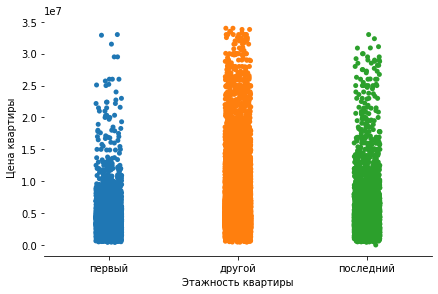

In [118]:
g = sns.catplot(x="floor_type", y="last_price", data = df_itog, 
                height=4,
                aspect=1.5,
                order = ['первый', 'другой', 'последний'])
(g.set_axis_labels("Этажность квартиры", "Цена квартиры")
  .despine(left=True))

**вывод** Этажность квартиры влияет на цену.Стоимость квартир, находящихся на промежуточных этажах, выше, чем на других. На первом этаже есть дорогие квартиры, возможно у них большая площадь. Однако, можно заметить в большинстве случае квартиры на последнем этаже дороже, чем на первом.

Осталось проверить зависимость от даты размещения (день недели, месяц и год)  `weekday_name` `month_name` `year_name`

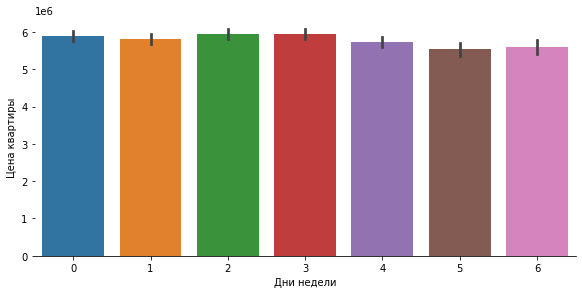

In [119]:
g = sns.catplot(x="weekday_name", y="last_price", data = df_itog, 
                height=4,
                aspect=2,
                kind="bar",
                )
(g.set_axis_labels("Дни недели", "Цена квартиры")
  .despine(left=True))  

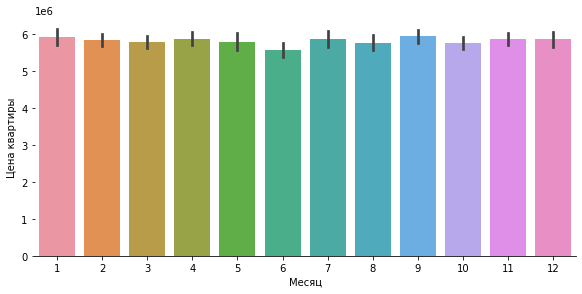

In [120]:
g = sns.catplot(x="month_name", y="last_price", data = df_itog, 
                height=4,
                aspect=2,
                kind="bar",
                )
(g.set_axis_labels("Месяц", "Цена квартиры")
  .despine(left=True))  

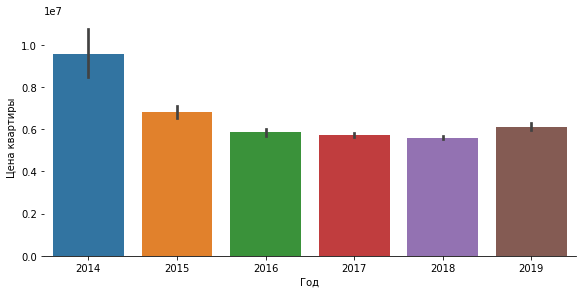

In [121]:
g = sns.catplot(x="year_name", y="last_price", data = df_itog, 
                height=4,
                aspect=2,
                kind="bar",
                )
(g.set_axis_labels("Год", "Цена квартиры")
  .despine(left=True))

**вывод** дороже всего были квартиры в 2015 году, потом цены снижались, но с 2019 опять выросли. По месяцам можно сказать, что летом квартиры были дешевле. 

**Рассчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**
Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [122]:
best_count= df_itog.groupby('locality_name').agg(
                                                  count=('locality_name', 'count'),
                                                  mean_price_square_meter=('price_square_meter', 'mean')) 
best_count.sort_values(by='count', ascending=False, inplace = True)
best_ten = best_count.iloc[:10].round(2)
print(best_ten)

                   count  mean_price_square_meter
locality_name                                    
Санкт-Петербург    15134                110503.66
поселок Мурино       522                 85404.87
поселок Шушары       422                 77934.85
Всеволожск           389                 68687.79
Пушкин               359                102981.19
Колпино              335                 75302.82
поселок Парголово    307                 89597.65
Гатчина              300                 69028.72
деревня Кудрово      291                 92632.31
Выборг               232                 58117.72


**Вычислим среднюю цену километра удаленности от центра для Санкт-Петербурга**


Для определения радиуса центра Санкт-Петербурга рассчитаем описательные статистики

In [123]:
df_itog['cityCenters_nearest_km'].describe()

count    22821.000000
mean        25.206433
std         22.230815
min          0.000000
25%         11.000000
50%         15.000000
75%         31.000000
max         66.000000
Name: cityCenters_nearest_km, dtype: float64

Видим, что половина значений лежит левее 15. Построим как меняется цена в радиусе 15 км.

In [124]:
df_SPb = df_itog[(df_itog.locality_name == 'Санкт-Петербург') &
                 (df_itog.cityCenters_nearest_km <= 15)].groupby('cityCenters_nearest_km') \
                 .agg(price_square_meter=('price_square_meter', 'mean'))
print(df_SPb.round(2))

                        price_square_meter
cityCenters_nearest_km                    
0.0                              152097.85
1.0                              142744.54
2.0                              127673.17
3.0                              116935.61
4.0                              124417.13
5.0                              131269.92
6.0                              132032.50
7.0                              133153.12
8.0                              123492.22
9.0                              111980.58
10.0                             112608.36
11.0                             108035.06
12.0                             107795.36
13.0                             107852.04
14.0                             103994.52
15.0                             104043.09


<AxesSubplot:xlabel='cityCenters_nearest_km'>

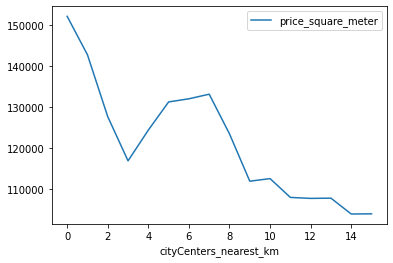

In [125]:
df_SPb.plot()

Видно, что после 9 км цена уменшается, но уже не так заметно. Будем считать, что 9 км это радиус центра СПб. На расстоянии примерно 3 км есть сильный провал по цене, но квартиры расположеныые в радиусе 5-7 км от ценра достаточно дорогие. Возможно это связано с рельефом города (наличие рек и промышленных зон). Для точной оценки по территориальному признаку я бы вводила квадраты, которые более точно отражали наличие недвижимости и инфроструктуры, а не круговой радиус.

## Общий вывод

По результатам проведенного исследовательского анализа данных мы получили следующие выводы:

1. Правильная оценка качества данных позволяет провести максимально достоверный анализ. Это очень важный пункт в исследовании и им нельзя пренебречь.

2. Про данные мы можем сказать следующее:
     * В среднем в нашей выборке представлены небольшие квартиры ~ 52-54 кв.м.
     * средняя жилая площадь ~ 32 кв.м.
     * средняя площадь кухни 9 кв.м.
     * средняя цена объекта ~ 4.6 млн.руб.
     * средняя цена кв.м. - 95 000 руб.
     * преобладают 1 и 2х комнатные квартиры
     * высота потолков чаще всего 2,64 м
     * чаще всего встречаются квартиры не выше 5 го этажа
     * Больше всего 5ти этажных домов, на 2м месте 9ти этажные
     * до ближайшего аэропорта среднее расстояние 33 км
     * в среднем от центра города объекты расположены на расстоянии 15 км
     * до ближайшего парка среднее расстояние 3 км
     * публикации чаще всего делали на буднях
     * чаще всего объявления делали в начале года (после праздников) и после лета, с увеличением в концу года)
     * больше всего квартир продавалось в середине дома. Меньше всего на первых этажах
     

3.  В среднем квартира продается за 120 дней ( 4 месяца). Есть достаточно большое количество быстрых продаж - объявление висит только 1 день. Самый долго продаваемый объект 1580 дней ~ 3,5 года    

4. Дороже всего были квартиры в 2015 году, потом цены снижались, но с 2019 опять выросли. По месяцам можно сказать, что летом квартиры были дешевле.

5. Стоимость квартиры зависит от ее площади, этажа, количества комнат и удаленности от центра. С ростом первых трех факторов наблюдается рост стоимости квартиры, а вот по мере удаления от центра населенного пункта стоимости квартиры снижается.

6. Вычисленна средняя стоимость кв. м. в 10 населенных пунктах, где было наибольшее количество объявлений. Она составляет:

|Название населенного пункта|количество объявлений|средняя стоимость кв. м.|
|-----:|------:|:------|
|Санкт-Петербург   |15134  |110503.65|
|поселок Мурино    |  522 |85404.86|
|поселок Шушары    |  422|77934.84|
|Всеволожск        |  389|68687.78|
|Пушкин            |  359|102981.19|
|Колпино           |  335|75302.82|
|поселок Парголово |  307|89597.64|
|Гатчина           |  300|69028.71|
|деревня Кудрово   |  291|92632.31|
|Выборг            |  232 |58117.71|

7. Определен радиус центра города - Санкт-Петербург и вычислена средняя стоимость кв. м. отностиельно центра. Она составляет:
|Расстояние от центра в км|средняя стоимость кв. м.|
|-----:|------:| 
|0.0 |152097.85|
|1.0|142744.54|
|2.0 |127673.17|
|3.0 |116935.61|
|4.0 |124417.13|
|5.0 |131269.92|
|6.0|132032.50|
|7.0 |133153.12|
|8.0|123492.22|
|9.0 | 111980.58|

6. Правильно подобранные типы графиков позволяют максимально быстро сформировать представление о полученных количественных результатах.

7. Если дополнить данные более точными территориальными и качественными характеристиками (район город, год постройки дома, его вид, лифт и прочее) то на основе этих данных можно будет построить модель, предсказывающую цену объекта и время за которое его удасться продать. Модель будет основыватся на статистике по похожим объектам. 

